In [1]:
import pandas as pd
import numpy as np

## Data Cleaning

In [2]:
df=pd.read_excel('card transactions.xlsx')
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
df = df.loc[df['Transtype']=='P']
df.sort_values(by=['Amount'], ascending=False)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
52714,52715,5142189135,2010-07-13,NaN,INTERMEXICO,NaN,NaN,P,3102045.53,0
47339,47340,5142275225,2010-06-22,NaN,INTERSOL,NaN,NaN,P,47900.00,0
59516,59517,5142138135,2010-08-03,900009045549,KRACKELER SCIENTIFIC,NY,12202.0,P,30372.46,1
80886,80887,5142152857,2010-10-11,NaN,CANYON ELECTRIC,NV,89102.0,P,28392.84,1
89673,89674,5142183210,2010-11-29,NaN,CRUCIAL TECH./MICRON,ID,83642.0,P,27218.00,0
...,...,...,...,...,...,...,...,...,...,...
47165,47166,5142148452,2010-06-22,930009906224,FEDEX SHP 05/23/10 AB#,TN,38118.0,P,0.08,0
57855,57856,5142129787,2010-07-30,9108347680000,STAPLES NATIONAL #471,NJ,7606.0,P,0.02,0
78387,78388,5142236687,2010-09-28,9108233080006,STAPLES #990,CA,90640.0,P,0.01,0
91179,91180,5142239369,2010-12-06,89200648125,JOHN WILEY & SON SOMERSET,NJ,8875.0,P,0.01,0


In [4]:
df.drop(52714,inplace=True)

### Filling Missing Merchnum

In [5]:
# Number of missing values
missing_merchnum=df['Merchnum'].isnull().sum()
missing_merchnum

3198

In [6]:
# Number of zeros
len(df[df['Merchnum']=='0'])

53

In [7]:
description_of_missing_merchnum=pd.DataFrame(df.loc[df['Merchnum'].isnull()==True]['Merch description'].value_counts())
description_of_missing_merchnum.head()

,Merch description
RETAIL CREDIT ADJUSTMENT,383
RETAIL DEBIT ADJUSTMENT,308
IMPAC/TRI-COUNTY/FREED,197
ELSEVIER SCIENCE BV,58
CONSOLIDATED PLASTICS CO,58


In [8]:
# Replace all the zeros with NaN
df['Merchnum']=df['Merchnum'].replace('0',np.nan)

In [9]:
# Drop all the records that have neither Merchnum nor Merch description
# For each Merch description, find the mode Merchnum
merchnum_des = df[['Merchnum','Merch description']]
merchnum_des.dropna(inplace=True)
mapping = merchnum_des.groupby('Merch description')['Merchnum'].agg(lambda x: x.value_counts().index[0])
mapping = pd.DataFrame(mapping).reset_index()
mapping.head()

<ipython-input-9-62a8e656c1ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merchnum_des.dropna(inplace=True)


,Merch description,Merchnum
0,#9 SOFTWARE,6000330882278
1,(ISC)2 CERTIFICATION,590065510
2,0000000000000000000000,8168600400097
3,033007 KINKO'S,35068136338
4,05032 FLYING J,121075089FL96


In [10]:
# how='left': left join (take all the left and part of the right, fill in empty space with NaN)
# In the new dataframe, Merchnum_x is the original Merchnum, and
# Merchnum_y is the corresponding mode
df = pd.merge(left=df, right=mapping, how='left',left_on='Merch description', right_on='Merch description')
df.head()

,Recnum,Cardnum,Date,Merchnum_x,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Merchnum_y
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,5509006296254
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,61003026333
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,4503082993600
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,5509006296254
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,5509006296254


In [11]:
# For the records that have no Merchnum but the mode is known, filling the mode
df.loc[(df['Merchnum_x'].isna())&(~df['Merchnum_y'].isna()),'Merchnum_x']=df.loc[(df['Merchnum_x'].isna())&(~df['Merchnum_y'].isna()),'Merchnum_y']

In [12]:
# Change back column names
df.drop('Merchnum_y',axis=1,inplace=True)
df.rename(columns={'Merchnum_x':'Merchnum'},inplace=True)

In [13]:
df.loc[df['Merchnum'].isna()]['Merch description'].value_counts()[:4]

RETAIL CREDIT ADJUSTMENT    383
RETAIL DEBIT ADJUSTMENT     308
IMPAC/TRI-COUNTY/FREED      197
ELSEVIER SCIENCE BV          58
Name: Merch description, dtype: int64

In [14]:
# Filling the remaining missing Merchnum with "unknown"
df.loc[df['Merch description'].isin(df.loc[df['Merchnum'].isna()]['Merch description'].values),'Merchnum']='unknown'

In [15]:
# Check number of zeros
print('Number of zeros:',len(df[df['Merchnum']=='0']))
# Check number of missing values
print("Number of missing values:",df['Merchnum'].isnull().sum())

Number of zeros: 0
Number of missing values: 0


### Filling Missing Merch State

In [16]:
# Number of missing values
missing_merchstate=df['Merch state'].isnull().sum()
missing_merchstate

1020

Facts:
- 31040: GA
- 12108: NY
- 38117: TN
- 90805: CA
- 76302: TX
- 95461: CA
- 41160: KY

In [17]:
# Filling some Merch state based on our knowledge first
# Filling those foreign locations with "foreign"
for i in df.index:
    if df.loc[i,'Merch zip']==31040:
        df.loc[i,'Merch state']='GA'
    elif df.loc[i,'Merch zip']==12108:
        df.loc[i,'Merch state']='NY'
    elif df.loc[i,'Merch zip']==38117:
        df.loc[i,'Merch state']='TN'
    elif df.loc[i,'Merch zip']==90805:
        df.loc[i,'Merch state']='CA'
    elif df.loc[i,'Merch zip']==76302:
        df.loc[i,'Merch state']='TX'
    elif df.loc[i,'Merch zip']==95461:
        df.loc[i,'Merch state']='CA'
    elif df.loc[i,'Merch zip']==41160:
        df.loc[i,'Merch state']='KY'
    elif (df.loc[i,'Merch state']==0) and (df.loc[i,'Merch zip']<1000) and (df.loc[i,'Merch zip']>10):
        df.loc[i,'Merch state']='foreign'

In [18]:
missing_merchstate=df['Merch state'].isnull().sum()
missing_merchstate

1006

In [19]:
# Same logic here with filling in Merchnum
state_zip = df[['Merch state','Merch zip']]
state_zip.dropna(inplace=True)
mapping = state_zip.groupby('Merch zip')['Merch state'].agg(lambda x: x.value_counts().index[0])
mapping = pd.DataFrame(mapping).reset_index()
mapping.head()

<ipython-input-19-38259508c256>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_zip.dropna(inplace=True)


,Merch zip,Merch state
0,1.0,PA
1,2.0,MD
2,3.0,GA
3,5.0,IA
4,6.0,IL


In [20]:
df = pd.merge(left=df, right=mapping, how='left', left_on='Merch zip',right_on='Merch zip')
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state_x,Merch zip,Transtype,Amount,Fraud,Merch state_y
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,MA
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,MD
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,TN
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,TN


In [21]:
df.loc[(df['Merch state_x'].isna())&(~df['Merch state_y'].isna()),'Merch state_x'] = df.loc[(df['Merch state_x'].isna())&(~df['Merch state_y'].isna()),'Merch state_y']

In [22]:
df.drop('Merch state_y',axis=1,inplace=True)
df.rename(columns={'Merch state_x':'Merch state'},inplace=True)

In [23]:
df.loc[df['Merch state'].isna()]['Merch description'].value_counts()[:4]

RETAIL CREDIT ADJUSTMENT     357
RETAIL DEBIT ADJUSTMENT      295
ELSEVIER SCIENCE BV           58
XFR F/VILLARREAL 12637808     19
Name: Merch description, dtype: int64

In [24]:
df.loc[df['Merch description'].isin(df.loc[df['Merch state'].isna()]['Merch description'].values),'Merch state']='unknown'

In [25]:
# Check number of missing values
print("Number of missing values:",df['Merch state'].isnull().sum())

Number of missing values: 0


### Filling Missing Merch Zip

In [26]:
# Number of missing values
missing_merchzip=df['Merch zip'].isnull().sum()
missing_merchzip

4300

In [27]:
# Filling some Merchnum based on our knowledge first
df.loc[df['Merch description']=='1','Merch zip'] = 13202

In [28]:
# Same logic here with filling Merchnum
des_zip = df[['Merch description','Merch state','Merch zip']]
des_zip.dropna(inplace=True)
des_zip.head()

<ipython-input-28-d4de44aac64b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_zip.dropna(inplace=True)


,Merch description,Merch state,Merch zip
0,FEDEX SHP 12/23/09 AB#,TN,38118.0
1,SERVICE MERCHANDISE #81,MA,1803.0
2,OFFICE DEPOT #191,MD,20706.0
3,FEDEX SHP 12/28/09 AB#,TN,38118.0
4,FEDEX SHP 12/23/09 AB#,TN,38118.0


In [29]:
mapping = des_zip.groupby(['Merch description','Merch state'])['Merch zip'].agg(lambda x: x.value_counts().index[0])
mapping = pd.DataFrame(mapping).reset_index()
mapping.head()

,Merch description,Merch state,Merch zip
0,#9 SOFTWARE,VA,23663.0
1,(ISC)2 CERTIFICATION,MA,1545.0
2,0000000000000000000000,WA,98052.0
3,033007 KINKO'S,NC,27713.0
4,05032 FLYING J,NM,87105.0


In [30]:
df = pd.merge(left=df, right=mapping, how='left', left_on=['Merch description','Merch state'],right_on=['Merch description','Merch state'])

In [31]:
df.loc[(df['Merch zip_x'].isna())&(~df['Merch zip_y'].isna()),'Merch zip_x'] = df.loc[(df['Merch zip_x'].isna())&(~df['Merch zip_y'].isna()),'Merch zip_y']

In [32]:
df.drop('Merch zip_y',axis=1,inplace=True)
df.rename(columns={'Merch zip_x':'Merch zip'},inplace=True)

In [33]:
df.loc[df['Merch description'].isin(df.loc[df['Merch zip'].isna()]['Merch description'].values),'Merch zip']='unknown'

In [34]:
# Check number of missing values
print('Number of missing values:',df['Merch zip'].isnull().sum())

Number of missing values: 0


## Creat Variables

### Day of week risk table

In [35]:
import calendar

In [36]:
# day of week
df['dow']=df['Date'].apply(lambda x:calendar.day_name[x.weekday()])

In [37]:
train_test=df[df['Date']<'2010-11-01']

In [38]:
# do statistical smoothing
c=4
nmid=20
y_avg=train_test['Fraud'].mean()
y_dow=train_test.groupby('dow')['Fraud'].mean()
num=train_test.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
df['dow_risk']=df.dow.map(y_dow_smooth)

Text(0.5, 1.0, 'Fraud Proportion of Each Weekday')

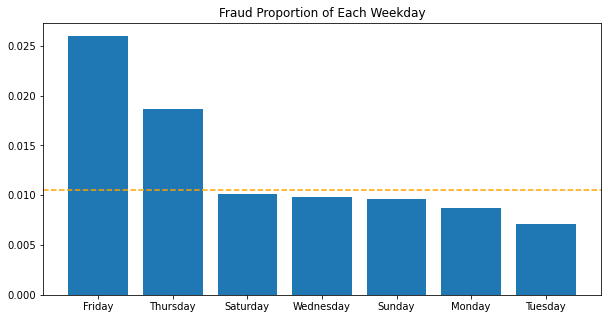

In [39]:
import matplotlib.pyplot as plt
dow=pd.DataFrame(data=y_dow).sort_values('Fraud',ascending=False)
plt.figure(figsize=(10,5))
plt.bar(dow.index,dow['Fraud'])
plt.axhline(y=y_avg,color='orange',linestyle="--")
plt.title('Fraud Proportion of Each Weekday')

### Benford's law for merchant and cardnumber

In [40]:
import re

In [41]:
# Find out all the Fedex transactions
droplist=[]
for i in range(len(df)):
    check=re.search('FEDEX',df.loc[i,'Merch description']) is None
    if check==False:
        droplist.append(i)

In [42]:
# Check the number of records will be dropped
len(droplist)

11775

In [43]:
df_ben=df.drop(droplist)

In [44]:
df_ben.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dow,dow_risk
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,Friday,0.025994
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Friday,0.025994
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429,P,230.32,0,Friday,0.025994
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091,P,62.11,0,Friday,0.025994
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061,P,106.89,0,Friday,0.025994


In [45]:
print('Maximum amount: ',df_ben['Amount'].max())
print('Minimum amount: ',df_ben['Amount'].min())

Maximum amount:  47900.0
Minimum amount:  0.01


In [46]:
# For each record, find the first digit of Amount
first_digit=[]
for i in df_ben['Amount']:
    if i>=10000:
        first_digit.append(int(i/10000))
    elif 10000>i>=1000:
        first_digit.append(int(i/1000))
    elif 1000>i>=100:
        first_digit.append(int(i/100))
    elif 100>i>=10:
        first_digit.append(int(i/10))
    elif 10>i>=1:
        first_digit.append(int(i))
    elif 1>i>=0.1:
        first_digit.append(int(i*10))
    elif 0.1>i>=0.01:
        first_digit.append(int(i*100))

In [47]:
df_ben['Amt_First_Digit']=first_digit

In [48]:
# Only use the train_test data to avoid overfitting
train_test_ben=df_ben[df_ben['Date']<'2010-11-01']

In [49]:
# For each Cardnum, find the smoothed unusualness
c=3
nmid=15
U_star=[]
for i in train_test_ben['Cardnum'].unique():
    n=len(train_test_ben.loc[train_test_ben['Cardnum']==i,'Amount'])
    n_1=len(train_test_ben.loc[(train_test_ben['Cardnum']==i)&(train_test_ben['Amt_First_Digit']==1),'Amt_First_Digit'])
    n_2=len(train_test_ben.loc[(train_test_ben['Cardnum']==i)&(train_test_ben['Amt_First_Digit']==2),'Amt_First_Digit'])
    n_low=max(n_1+n_2,1)
    n_high=max(n-n_low,1)
    R=1.096*n_low/n_high
    R_inverse=1/R
    U=max(R,R_inverse)
    t=(n-nmid)/c
    U_star.append(1+((U-1)/(1+np.exp(-t))))

In [50]:
top_Cardnum=pd.DataFrame(train_test_ben['Cardnum'].unique(),columns=['Cardnum'])
top_Cardnum['U_star']=U_star
top_Cardnum.sort_values(by=['U_star'],ascending=False)

,Cardnum,U_star
23,5142253356,12.932799
1501,5142299705,9.027976
22,5142197563,7.299270
976,5142194617,6.368290
1184,5142284940,4.513392
...,...,...
1239,5142301566,1.000894
1513,5142133093,1.000894
1254,5142229531,1.000894
1616,5142268520,1.000894


In [51]:
df_ben=pd.merge(left=df_ben,right=top_Cardnum,how='left',left_on='Cardnum',right_on='Cardnum')
df_ben.rename(columns={'U_star':'Benford_Cardnum'},inplace=True)

In [52]:
# For each Merchnum, find the smoothed unusualness
c=3
nmid=15
U_star=[]
for i in train_test_ben['Merchnum'].unique():
    n=len(train_test_ben.loc[train_test_ben['Merchnum']==i,'Amount'])
    n_1=len(train_test_ben.loc[(train_test_ben['Merchnum']==i)&(train_test_ben['Amt_First_Digit']==1),'Amt_First_Digit'])
    n_2=len(train_test_ben.loc[(train_test_ben['Merchnum']==i)&(train_test_ben['Amt_First_Digit']==2),'Amt_First_Digit'])
    n_low=max(n_1+n_2,1)
    n_high=max(n-n_low,1)
    R=1.096*n_low/n_high
    R_inverse=1/R
    U=max(R,R_inverse)
    t=(n-nmid)/c
    U_star.append(1+((U-1)/(1+np.exp(-t))))

In [53]:
top_Merchnum=pd.DataFrame(train_test_ben['Merchnum'].unique(),columns=['Merchnum'])
top_Merchnum['U_star']=U_star
top_Merchnum.sort_values(by=['U_star'],ascending=False)

,Merchnum,U_star
18,991808369338,151.459854
2290,8078200641472,64.663973
4195,3523000628102,37.199706
614,808998385332,29.127360
387,55158027,26.741995
...,...,...
6488,6070032190065,1.000894
6486,8006000808492,1.000894
6484,465616666339,1.000894
3328,910909560223,1.000706


In [54]:
df_ben=pd.merge(left=df_ben,right=top_Merchnum,how='left',left_on='Merchnum',right_on='Merchnum')
df_ben.rename(columns={'U_star':'Benford_Merchnum'},inplace=True)

### Amount related variables

In [55]:
df['Merch zip']=df['Merch zip'].astype(str)
df['Cardnum']=df['Cardnum'].astype(str)

In [56]:
for field in list(df.iloc[:,np.r_[3,4:7]].columns):
    df['Cardnum_'+field] = df.Cardnum + df[field]

In [57]:
df1 = df.copy()
final = df.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum

In [58]:
attributes = list(df.iloc[:,np.r_[1,3:5,12:16]].columns)

In [59]:
import datetime as dt

In [60]:
for entity in attributes:
    df_l = df1[['Recnum','Date',entity]]
    df_r = df1[['check_record','check_date', 'Amount',entity]]
    temp = pd.merge(df_l, df_r, how='left',on=entity)
    
    # Average
    for offset_t in [0,1,3,7,14,30]:
        average_day_df = temp[(temp.check_date >= (temp.Date - dt.timedelta(offset_t)))&
                            (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_average_{offset_t}'
        mapper1 = average_day_df.groupby('Recnum')['Amount'].mean()
        final[col_name] = final.Recnum.map(mapper1)
        print(f'{entity}_average_{str(offset_t)} ---> Done')
        
    # Maximum
    for offset_t in [0,1,3,7,14,30]:
        max_day_df = temp[(temp.check_date >= (temp.Date - dt.timedelta(offset_t)))&
                            (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_maximum_{offset_t}'
        mapper2 = max_day_df.groupby('Recnum')['Amount'].max()
        final[col_name] = final.Recnum.map(mapper2)
        print(f'{entity}_maximum_{str(offset_t)} ---> Done')
        
    # Median
    for offset_t in [0,1,3,7,14,30]:
        median_day_df = temp[(temp.check_date >= (temp.Date - dt.timedelta(offset_t)))&
                            (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_median_{offset_t}'
        mapper3 = median_day_df.groupby('Recnum')['Amount'].median()
        final[col_name] = final.Recnum.map(mapper3)
        print(f'{entity}_median_{str(offset_t)} ---> Done')
        
    # Total
    for offset_t in [0,1,3,7,14,30]:
        total_day_df = temp[(temp.check_date >= (temp.Date - dt.timedelta(offset_t)))&
                            (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_total_{offset_t}'
        mapper4 = total_day_df.groupby('Recnum')['Amount'].sum()
        final[col_name] = final.Recnum.map(mapper4)
        print(f'{entity}_total_{str(offset_t)} ---> Done')
    
print('Done')

Cardnum_average_0 ---> Done
Cardnum_average_1 ---> Done
Cardnum_average_3 ---> Done
Cardnum_average_7 ---> Done
Cardnum_average_14 ---> Done
Cardnum_average_30 ---> Done
Cardnum_maximum_0 ---> Done
Cardnum_maximum_1 ---> Done
Cardnum_maximum_3 ---> Done
Cardnum_maximum_7 ---> Done
Cardnum_maximum_14 ---> Done
Cardnum_maximum_30 ---> Done
Cardnum_median_0 ---> Done
Cardnum_median_1 ---> Done
Cardnum_median_3 ---> Done
Cardnum_median_7 ---> Done
Cardnum_median_14 ---> Done
Cardnum_median_30 ---> Done
Cardnum_total_0 ---> Done
Cardnum_total_1 ---> Done
Cardnum_total_3 ---> Done
Cardnum_total_7 ---> Done
Cardnum_total_14 ---> Done
Cardnum_total_30 ---> Done
Merchnum_average_0 ---> Done
Merchnum_average_1 ---> Done
Merchnum_average_3 ---> Done
Merchnum_average_7 ---> Done
Merchnum_average_14 ---> Done
Merchnum_average_30 ---> Done
Merchnum_maximum_0 ---> Done
Merchnum_maximum_1 ---> Done
Merchnum_maximum_3 ---> Done
Merchnum_maximum_7 ---> Done
Merchnum_maximum_14 ---> Done
Merchnum_maximum

In [61]:
for i in final.columns[16:]:
    final['Actual_to_'+i]=final['Amount']/final[i]

### Frequency Variables + Day Since

In [62]:
for entity in attributes:
    df_l = df1[['Recnum','Date', entity]]
    df_r = df1[['check_record','check_date', entity]]
    temp = pd.merge(df_l, df_r, how='left',on=entity)
    
    # day since
    day_since_df = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (day_since_df.Date - day_since_df.check_date).dt.days
    final[entity+'_day_since'] = final.Recnum.map(mapper)
    final[entity+'_day_since'].fillna(365, inplace=True)
    print(f'\n{entity}_day_since ---> Done')
    
    # frequency
    for offset_t in [0,1,3,7,14,30]:
        count_day_df = temp[(temp.check_date >= (temp.Date - dt.timedelta(offset_t)))&
                            (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('Recnum')[entity].count()
        final[col_name] = final.Recnum.map(mapper2)
        print(f'{entity}_count_{str(offset_t)} ---> Done')


Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum_count_1 ---> Done
Cardnum_count_3 ---> Done
Cardnum_count_7 ---> Done
Cardnum_count_14 ---> Done
Cardnum_count_30 ---> Done

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum_count_1 ---> Done
Merchnum_count_3 ---> Done
Merchnum_count_7 ---> Done
Merchnum_count_14 ---> Done
Merchnum_count_30 ---> Done

Merch description_day_since ---> Done
Merch description_count_0 ---> Done
Merch description_count_1 ---> Done
Merch description_count_3 ---> Done
Merch description_count_7 ---> Done
Merch description_count_14 ---> Done
Merch description_count_30 ---> Done

Cardnum_Merchnum_day_since ---> Done
Cardnum_Merchnum_count_0 ---> Done
Cardnum_Merchnum_count_1 ---> Done
Cardnum_Merchnum_count_3 ---> Done
Cardnum_Merchnum_count_7 ---> Done
Cardnum_Merchnum_count_14 ---> Done
Cardnum_Merchnum_count_30 ---> Done

Cardnum_Merch description_day_since ---> Done
Cardnum_Merch description_count_0 ---> Done
Cardnum_Merch descrip

### Velocity

In [63]:
# Number
for att in attributes:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            final[att+'_count_'+d+'_by_'+dd]\
                =final[att+'_count_'+d]/(final[att+'_count_'+dd]/float(dd))

In [64]:
# Amount
for att in attributes:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            final[att+'_amount_'+d+'_by_'+dd]\
                =final[att+'_total_'+d]/(final[att+'_total_'+dd]/float(dd))

In [65]:
print('Number of variables created: ', len(final.columns[16:])+3)

Number of variables created:  500


- Dow risk table: 1
- Benford: 2
- Amount: 8 * 7 * 6=336
- Frequency: 6 * 7=42
- Day_since: 7
- Velocity: 2 * 2 * 4 * 7=112
- Total number of variables: 500

In [66]:
FINAL=final.copy()

In [67]:
ben=pd.merge(left=df,right=df_ben,how='left',left_on='Recnum',right_on='Recnum').fillna(0)

In [68]:
c=ben.iloc[:,-2:]

In [69]:
variables=pd.concat([FINAL,c],axis=1)
variables.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Cardnum_Merch zip_amount_0_by_3,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,0.000000,0.000000
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,1.539949,1.000894
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,2.428392,1.019795
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,0.000000,0.000000
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,0.000000,0.000000


## Feature Selection

In [70]:
from scipy.stats import ks_2samp
from numpy import random  

In [71]:
data = variables.copy()

In [72]:
randomness=pd.Series(random.normal(0,1,size=96397))
data['random']=randomness
data.describe()

,Recnum,Amount,Fraud,dow_risk,Cardnum_average_0,Cardnum_average_1,Cardnum_average_3,Cardnum_average_7,Cardnum_average_14,Cardnum_average_30,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,random
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,...,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,395.858494,0.010986,0.010825,393.557490,395.450685,395.852929,397.185701,396.993474,396.584504,...,5.908263,10.941314,21.042508,2.841832,6.108134,11.280819,21.652087,1.180181,1.608299,-0.002519
std,27945.003883,832.330197,0.104236,0.004754,726.845846,675.825659,629.374341,560.075710,522.916559,479.342519,...,2.092568,4.807598,11.419258,0.526155,1.888860,4.546052,11.092278,0.717535,6.949226,0.997345
min,1.000000,0.010000,0.000000,0.007127,0.010000,0.010000,0.010000,0.140000,0.140000,0.170000,...,0.000473,0.000930,0.000926,0.002844,0.000473,0.000945,0.001013,0.000000,0.000000,-4.156136
25%,24154.000000,33.460000,0.000000,0.008711,42.835000,54.540000,68.250000,95.226000,119.940000,149.896667,...,6.585741,7.200000,9.462458,3.000000,7.000000,8.946673,10.720775,1.042467,1.001244,-0.675795
50%,48365.000000,137.980000,0.000000,0.009630,160.000000,188.500000,213.664000,251.834286,279.450000,303.998182,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.153929,1.069696,-0.002645
75%,72578.000000,428.250000,0.000000,0.010095,453.900000,477.415000,491.550000,502.698000,502.776667,496.675000,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.352511,1.240876,0.671114
max,96753.000000,47900.000000,1.000000,0.025994,28392.840000,28392.840000,28392.840000,25500.000000,25500.000000,25500.000000,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,12.932799,151.459854,4.310876


In [73]:
df=data[(data['Date']<'2010-11-01')&(data['Date']>'2010-01-14')]
df.Fraud.value_counts()

0    79764
1      868
Name: Fraud, dtype: int64

In [74]:
df_med=df.copy()

In [75]:
df=df_med.iloc[:,8:]
df.head()

,Amount,Fraud,dow,dow_risk,Cardnum_Merchnum,Cardnum_Merch description,Cardnum_Merch state,Cardnum_Merch zip,Cardnum_average_0,Cardnum_average_1,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,random
3338,333.47,0,Friday,0.025994,5142289869602608969534,5142289869FISHER SCI ATL,5142289869GA,514228986930091.0,333.470,517.006667,...,1.190800,2.381600,5.103430,3.000000,1.190800,2.381600,5.103430,1.061535,1.003246,0.181307
3339,4.37,0,Friday,0.025994,51421484525509006296254,5142148452FEDEX SHP 01/10/10 AB#,5142148452TN,514214845238118.0,4.370,330.435000,...,0.089646,0.115430,0.247349,0.073482,0.089646,0.115430,0.247349,0.000000,0.000000,0.267029
3340,271.93,0,Friday,0.025994,5142184598680655463,5142184598MC MASTER CARR SUPP,5142184598IL,514218459860126.0,271.930,414.868571,...,3.265362,1.650218,3.536182,3.000000,7.000000,3.537595,7.580560,1.059278,1.719540,0.147896
3341,3.62,0,Friday,0.025994,51421484525509006296254,5142148452FEDEX SHP 01/10/10 AB#,5142148452TN,514214845238118.0,3.995,221.496667,...,0.162186,0.209617,0.449179,0.131682,0.162186,0.209617,0.449179,0.000000,0.000000,-0.085587
3342,16.28,0,Friday,0.025994,51421958874503082616100,5142195887OFFICE DEPOT #122,5142195887NC,514219588727707.0,16.280,16.280000,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,2.204858,1.120959,-0.287850


In [81]:
attributes=['dow','Cardnum_Merchnum', 'Cardnum_Merch description', 'Cardnum_Merch state', 'Cardnum_Merch zip']
df=df.drop(attributes,axis=1)
df.head()

,Amount,Fraud,dow_risk,Cardnum_average_0,Cardnum_average_1,Cardnum_average_3,Cardnum_average_7,Cardnum_average_14,Cardnum_average_30,Cardnum_maximum_0,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,random
3338,333.47,0,0.025994,333.470,517.006667,280.675714,399.058889,399.819048,399.819048,333.47,...,1.190800,2.381600,5.103430,3.000000,1.190800,2.381600,5.103430,1.061535,1.003246,0.181307
3339,4.37,0,0.025994,4.370,330.435000,24.556176,13.857361,9.970756,9.970756,4.37,...,0.089646,0.115430,0.247349,0.073482,0.089646,0.115430,0.247349,0.000000,0.000000,0.267029
3340,271.93,0,0.025994,271.930,414.868571,604.281429,569.067059,448.597576,448.597576,271.93,...,3.265362,1.650218,3.536182,3.000000,7.000000,3.537595,7.580560,1.059278,1.719540,0.147896
3341,3.62,0,0.025994,3.995,221.496667,23.958000,13.717123,9.917833,9.917833,4.37,...,0.162186,0.209617,0.449179,0.131682,0.162186,0.209617,0.449179,0.000000,0.000000,-0.085587
3342,16.28,0,0.025994,16.280,16.280000,16.280000,16.280000,16.280000,16.280000,16.28,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,2.204858,1.120959,-0.287850


In [84]:
fraud=df.Fraud
df.drop(labels=['Fraud'], axis=1,inplace = True)
df.insert(0, 'Fraud', fraud)
df.head()

,Fraud,Amount,dow_risk,Cardnum_average_0,Cardnum_average_1,Cardnum_average_3,Cardnum_average_7,Cardnum_average_14,Cardnum_average_30,Cardnum_maximum_0,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,random
3338,0,333.47,0.025994,333.470,517.006667,280.675714,399.058889,399.819048,399.819048,333.47,...,1.190800,2.381600,5.103430,3.000000,1.190800,2.381600,5.103430,1.061535,1.003246,0.181307
3339,0,4.37,0.025994,4.370,330.435000,24.556176,13.857361,9.970756,9.970756,4.37,...,0.089646,0.115430,0.247349,0.073482,0.089646,0.115430,0.247349,0.000000,0.000000,0.267029
3340,0,271.93,0.025994,271.930,414.868571,604.281429,569.067059,448.597576,448.597576,271.93,...,3.265362,1.650218,3.536182,3.000000,7.000000,3.537595,7.580560,1.059278,1.719540,0.147896
3341,0,3.62,0.025994,3.995,221.496667,23.958000,13.717123,9.917833,9.917833,4.37,...,0.162186,0.209617,0.449179,0.131682,0.162186,0.209617,0.449179,0.000000,0.000000,-0.085587
3342,0,16.28,0.025994,16.280,16.280000,16.280000,16.280000,16.280000,16.280000,16.28,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,2.204858,1.120959,-0.287850


### Calculate univariate KS

In [76]:
goods=df[df['Fraud']==0]
bads=df[df['Fraud']==1]

In [85]:
KSFDR=pd.DataFrame(df.columns,columns=['variables'])
KSFDR

,variables
0,Fraud
1,Amount
2,dow_risk
3,Cardnum_average_0
4,Cardnum_average_1
...,...
498,Cardnum_Merch zip_amount_1_by_14
499,Cardnum_Merch zip_amount_1_by_30
500,Benford_Cardnum
501,Benford_Merchnum


In [86]:
i=0
for column in df.columns:
    KSFDR.loc[i,'ks']=ks_2samp(goods[column],bads[column])[0]  
    #ks_2samp returns two numbers: KS statistic and two-tailed p-value 
    i=i+1
KSFDR

,variables,ks
0,Fraud,1.000000
1,Amount,0.547575
2,dow_risk,0.134586
3,Cardnum_average_0,0.570021
4,Cardnum_average_1,0.571881
...,...,...
498,Cardnum_Merch zip_amount_1_by_14,0.076899
499,Cardnum_Merch zip_amount_1_by_30,0.148461
500,Benford_Cardnum,0.470539
501,Benford_Merchnum,0.298477


### Calculate univariate FDR@3%

In [87]:
topRows = int(round(len(df)*0.03))
numbads= int(len(bads))

In [88]:
j = 1
for column in df.columns[1:]:
    temp = df[[column,'Fraud']].copy()
    temp0 = temp.sort_values(column,ascending=False)
    temp1 = temp0.head(topRows)
    temp2 = temp0.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR.loc[j, 'FDR'] = FDRate
    j = j + 1

In [89]:
KSFDR.loc[0,'FDR']=1

### Sort by average rank

In [90]:
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)

In [91]:
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False,inplace=True)
KSFDR

,variables,ks,FDR,rank_ks,rank_FDR,average_rank
0,Fraud,1.000000,1.000000,503.0,503.0,503.00
168,Cardnum_Merch zip_total_7,0.685220,0.638249,502.0,499.5,500.75
167,Cardnum_Merch zip_total_3,0.677977,0.641705,500.0,501.0,500.50
96,Cardnum_Merchnum_total_7,0.681463,0.633641,501.0,497.0,499.00
120,Cardnum_Merch description_total_7,0.671453,0.638249,495.0,499.5,497.25
...,...,...,...,...,...,...
402,Merchnum_count_1_by_14,0.136140,0.011521,57.0,10.5,33.75
242,Actual_to_Merch description_total_30,0.131612,0.012673,51.0,12.5,31.75
203,Actual_to_Merchnum_maximum_3,0.125110,0.013825,42.0,15.5,28.75
193,Actual_to_Cardnum_total_14,0.128733,0.011521,46.0,10.5,28.25


In [93]:
# Top 80
KSFDR = KSFDR.set_index('variables')
wrapper_df = df.loc[:,KSFDR[1:81].index]
wrapper_df

variables,Cardnum_Merch zip_total_7,Cardnum_Merch zip_total_3,Cardnum_Merchnum_total_7,Cardnum_Merch description_total_7,Cardnum_Merchnum_total_14,Cardnum_Merchnum_total_3,Cardnum_Merch description_total_3,Cardnum_Merch state_total_3,Cardnum_Merch description_total_14,Cardnum_Merch zip_total_14,...,Cardnum_Merch state_average_7,Cardnum_total_14,Cardnum_maximum_14,Cardnum_average_1,Cardnum_Merch zip_average_30,Merchnum_average_0,Cardnum_Merch state_average_1,Cardnum_average_3,Cardnum_Merchnum_average_3,Cardnum_Merch description_average_30
3338,1960.27,333.47,1960.27,1960.27,1960.27,333.47,333.47,333.47,1960.27,1960.27,...,653.423333,8396.20,1593.38,517.006667,653.423333,333.4700,333.470000,280.675714,333.470000,653.423333
3339,341.23,178.41,324.43,21.17,499.22,165.41,17.37,178.41,21.17,530.02,...,4.806056,1186.52,656.50,330.435000,4.491695,4.3700,4.370000,24.556176,5.169062,7.056667
3340,582.94,582.94,582.94,582.94,2306.98,582.94,582.94,955.00,2306.98,2306.98,...,238.750000,14803.72,2472.00,414.868571,256.331111,271.9300,194.313333,604.281429,194.313333,256.331111
3341,344.85,182.03,328.05,24.79,502.84,169.03,20.99,182.03,24.79,533.64,...,4.789583,1190.14,656.50,221.496667,4.484370,3.9950,3.995000,23.958000,5.122121,6.197500
3342,16.28,16.28,16.28,16.28,16.28,16.28,16.28,16.28,16.28,16.28,...,16.280000,16.28,16.28,16.280000,16.280000,16.2800,16.280000,16.280000,16.280000,16.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83965,299.77,299.77,299.77,299.77,299.77,299.77,299.77,299.77,299.77,299.77,...,299.770000,299.77,299.77,299.770000,299.770000,359.4450,299.770000,299.770000,299.770000,299.770000
83966,789.32,789.32,789.32,789.32,789.32,789.32,789.32,789.32,789.32,789.32,...,394.660000,789.32,609.34,394.660000,394.660000,271.6925,394.660000,394.660000,394.660000,394.660000
83967,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,...,235.000000,654.10,399.15,235.000000,235.000000,235.0000,235.000000,127.475000,235.000000,235.000000
83968,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.00,...,600.000000,600.00,600.00,600.000000,600.000000,600.0000,600.000000,600.000000,600.000000,600.000000


### Forward Selection

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [95]:
Y=df['Fraud']

In [97]:
def fdr(model, X,y):
    y_prob = model.predict_proba(X)[:,1]
    fdr = pd.DataFrame({'y_prob':y_prob,'y':y})
    fdr = fdr.sort_values('y_prob', ascending=False)
    numbads = len(fdr.loc[fdr['y']==1])
    top_rows = int(round(len(fdr)*0.03))
    head = fdr.head(top_rows)
    needed = len(head.loc[head['y']==1])
    fdr_val = needed/numbads
    return fdr_val

In [98]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10)
sfs=SFS(model,k_features=30,forward=True,verbose=2,scoring=fdr,cv=2)
sfs.fit(wrapper_df,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.2s finished

[2021-05-08 17:47:25] Features: 1/30 -- score: 0.5633640552995391[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   16.0s finished

[2021-05-08 17:47:41] Features: 2/30 -- score: 0.5610599078341014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   20.4s finished

[2021-05-08 17:48:01] Features: 3/30 -- score: 0.5633640552995391[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  2.3min finished

[2021-05-08 18:25:01] Features: 28/30 -- score: 0.6221198156682028[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  2.3min finished

[2021-05-08 18:27:17] Features: 29/30 -- score: 0.618663594470046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:  2.3min finished

[2021-05-08 18:29:38] Features: 30/30 -- score: 0.6140552995391706

SequentialFeatureSelector(cv=2, estimator=DecisionTreeClassifier(max_depth=10),
                          k_features=30,
                          scoring=<function fdr at 0x00000265368ED670>,
                          verbose=2)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


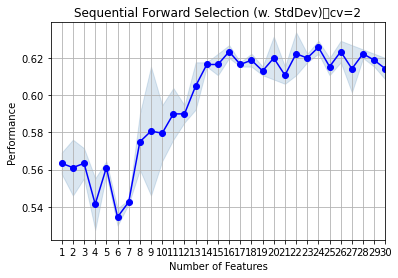

In [99]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev')
#plt.ylim([.95,1])
plt.xlim(0,30)
plt.title('Sequential Forward Selection (w. StdDev)，cv=2')
plt.grid()
plt.show()

In [100]:
vars_SFS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_SFS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.5691244239631337, 0.5576036866359447]",0.563364,"(Cardnum_Merch zip_total_14,)",0.0247849,0.00576037,0.00576037
2,"(8, 9)","[0.576036866359447, 0.5460829493087558]",0.56106,"(Cardnum_Merch description_total_14, Cardnum_M...",0.0644407,0.014977,0.014977
3,"(8, 9, 18)","[0.5552995391705069, 0.5714285714285714]",0.563364,"(Cardnum_Merch description_total_14, Cardnum_M...",0.0346988,0.00806452,0.00806452
4,"(8, 9, 14, 18)","[0.5552995391705069, 0.5276497695852534]",0.541475,"(Cardnum_Merch description_total_14, Cardnum_M...",0.0594837,0.0138249,0.0138249
5,"(8, 9, 14, 15, 18)","[0.5576036866359447, 0.5645161290322581]",0.56106,"(Cardnum_Merch description_total_14, Cardnum_M...",0.0148709,0.00345622,0.00345622
6,"(4, 8, 9, 14, 15, 18)","[0.5299539170506913, 0.5391705069124424]",0.534562,"(Cardnum_Merchnum_total_14, Cardnum_Merch desc...",0.0198279,0.00460829,0.00460829
7,"(4, 8, 9, 14, 15, 18, 55)","[0.5414746543778802, 0.543778801843318]",0.542627,"(Cardnum_Merchnum_total_14, Cardnum_Merch desc...",0.00495697,0.00115207,0.00115207
8,"(4, 7, 8, 9, 14, 15, 18, 55)","[0.5898617511520737, 0.5599078341013825]",0.574885,"(Cardnum_Merchnum_total_14, Cardnum_Merch stat...",0.0644407,0.014977,0.014977
9,"(4, 7, 8, 9, 14, 15, 18, 39, 55)","[0.6152073732718893, 0.5460829493087558]",0.580645,"(Cardnum_Merchnum_total_14, Cardnum_Merch stat...",0.148709,0.0345622,0.0345622
10,"(4, 6, 7, 8, 9, 14, 15, 18, 39, 55)","[0.5645161290322581, 0.5944700460829493]",0.579493,"(Cardnum_Merchnum_total_14, Cardnum_Merch desc...",0.0644407,0.014977,0.014977


### Backward Selection

In [101]:
sbs=SFS(model,k_features=30,forward=False,verbose=2,scoring=fdr,cv=2)
sbs.fit(wrapper_df,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.4min finished

[2021-05-08 18:39:10] Features: 79/30 -- score: 0.5357142857142857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:  9.0min finished

[2021-05-08 18:48:08] Features: 78/30 -- score: 0.5691244239631337[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:  8.6min finished

[2021-05-08 18:56:43] Features: 77/30 -- score: 0.5817972350230415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  3.8min finished

[2021-05-09 03:03:19] Features: 52/30 -- score: 0.6267281105990783[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  3.6min finished

[2021-05-09 03:06:56] Features: 51/30 -- score: 0.6290322580645161[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:  3.5min finished

[2021-05-09 03:10:24] Features: 50/30 -- score: 0.631336405529954[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished

[2021-05-09 03:13:45] Features: 49/3

SequentialFeatureSelector(cv=2, estimator=DecisionTreeClassifier(max_depth=10),
                          forward=False, k_features=30,
                          scoring=<function fdr at 0x00000265368ED670>,
                          verbose=2)

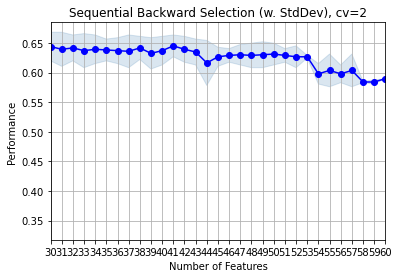

In [146]:
fig2 = plot_sfs(sbs.get_metric_dict(),
                kind='std_dev')
#plt.ylim([.95,1])
plt.xlim(30,60)
plt.title('Sequential Backward Selection (w. StdDev), cv=2')
plt.grid()
plt.show()

In [105]:
vars_SBS = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
vars_SBS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
80,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.47235023041474655, 0.33410138248847926]",0.403226,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.297418,0.0691244,0.0691244
79,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5046082949308756, 0.5668202764976958]",0.535714,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.133838,0.031106,0.031106
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5668202764976958, 0.5714285714285714]",0.569124,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.00991395,0.00230415,0.00230415
77,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5783410138248848, 0.5852534562211982]",0.581797,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.0148709,0.00345622,0.00345622
76,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5599078341013825, 0.5944700460829493]",0.577189,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.0743546,0.0172811,0.0172811
75,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5737327188940092, 0.5967741935483871]",0.585253,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.0495697,0.0115207,0.0115207
74,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5944700460829493, 0.5990783410138248]",0.596774,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.00991395,0.00230415,0.00230415
73,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5806451612903226, 0.5967741935483871]",0.58871,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.0346988,0.00806452,0.00806452
72,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5852534562211982, 0.5944700460829493]",0.589862,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.0198279,0.00460829,0.00460829
71,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5898617511520737, 0.5852534562211982]",0.587558,"(Cardnum_Merch zip_total_7, Cardnum_Merch zip_...",0.00991395,0.00230415,0.00230415


## EDA of final variables (examples)

In [106]:
import seaborn as sns

In [126]:
features= ['Date', 'Amount',
'Fraud',
'Cardnum_Merch zip_total_7',
'Cardnum_Merchnum_total_7',
'Cardnum_Merchnum_total_14',
'Cardnum_Merch state_total_3',
'Cardnum_Merch description_total_14',
'Cardnum_Merch zip_total_14',
'Cardnum_Merch state_total_1',
'Cardnum_Merchnum_total_30',
'Cardnum_Merch state_total_14',
'Cardnum_Merch description_total_1',
'Cardnum_Merch zip_total_30',
'Cardnum_Merch description_maximum_14',
'Cardnum_Merch description_total_0',
'Cardnum_Merch description_maximum_3',
'Cardnum_Merch description_maximum_7',
'Cardnum_Merch description_maximum_30',
'Cardnum_Merch state_maximum_14',
'Cardnum_Merch zip_maximum_3',
'Cardnum_total_7',
'Merch description_total_1',
'Cardnum_Merch state_total_30',
'Merchnum_maximum_0',
'Cardnum_total_0',
'Cardnum_Merch description_maximum_0',
'Cardnum_maximum_7',
'Cardnum_maximum_1',
'Merch description_total_7',
'Cardnum_Merch zip_average_30',
'Cardnum_maximum_14',
'Merchnum_average_0']

In [127]:
df_f = df_med[features]
df_f

,Date,Amount,Fraud,Cardnum_Merch zip_total_7,Cardnum_Merchnum_total_7,Cardnum_Merchnum_total_14,Cardnum_Merch state_total_3,Cardnum_Merch description_total_14,Cardnum_Merch zip_total_14,Cardnum_Merch state_total_1,...,Cardnum_Merch state_total_30,Merchnum_maximum_0,Cardnum_total_0,Cardnum_Merch description_maximum_0,Cardnum_maximum_7,Cardnum_maximum_1,Merch description_total_7,Cardnum_Merch zip_average_30,Cardnum_maximum_14,Merchnum_average_0
3338,2010-01-15,333.47,0,1960.27,1960.27,1960.27,333.47,1960.27,1960.27,333.47,...,1960.27,333.47,333.47,333.47,983.66,930.41,4879.97,653.423333,1593.38,333.4700
3339,2010-01-15,4.37,0,341.23,324.43,499.22,178.41,21.17,530.02,4.37,...,530.02,4.37,4.37,4.37,656.50,656.50,21.17,4.491695,656.50,4.3700
3340,2010-01-15,271.93,0,582.94,582.94,2306.98,955.00,2306.98,2306.98,582.94,...,2679.04,271.93,271.93,271.93,2472.00,1380.45,582.94,256.331111,2472.00,271.9300
3341,2010-01-15,3.62,0,344.85,328.05,502.84,182.03,24.79,533.64,7.99,...,533.64,4.37,7.99,4.37,656.50,656.50,24.79,4.484370,656.50,3.9950
3342,2010-01-15,16.28,0,16.28,16.28,16.28,16.28,16.28,16.28,16.28,...,16.28,16.28,16.28,16.28,16.28,16.28,499.62,16.280000,16.28,16.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83965,2010-10-31,299.77,0,299.77,299.77,299.77,299.77,299.77,299.77,299.77,...,299.77,419.12,299.77,299.77,299.77,299.77,2225.76,299.770000,299.77,359.4450
83966,2010-10-31,609.34,0,789.32,789.32,789.32,789.32,789.32,789.32,789.32,...,789.32,609.34,789.32,609.34,609.34,609.34,1205.11,394.660000,609.34,271.6925
83967,2010-10-31,235.00,0,235.00,235.00,235.00,235.00,235.00,235.00,235.00,...,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.000000,399.15,235.0000
83968,2010-10-31,600.00,0,600.00,600.00,600.00,600.00,600.00,600.00,600.00,...,600.00,600.00,600.00,600.00,600.00,600.00,600.00,600.000000,600.00,600.0000


Text(0.5, 1.0, 'Amount vs. Fraud')

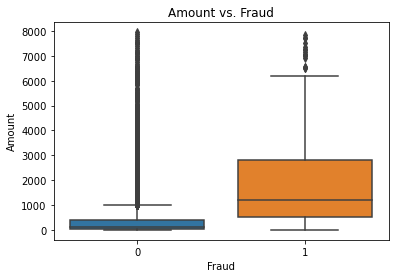

In [128]:
# Amount vs. Fraud
df_f2=df_f[df_f['Amount']<=8000]
sns.boxplot(df_f2.Fraud,df_f2['Amount'])
plt.title('Amount vs. Fraud')

Text(0.5, 1.0, 'Merchnum_average_0 vs. Fraud')

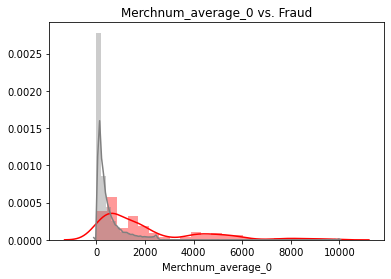

In [129]:
# Average
df_a = df[df['Merchnum_average_0']<10000]
sns.distplot(df_a[df_a['Fraud']==1]['Merchnum_average_0'],color='r')
sns.distplot(df_a[df_a['Fraud']==0]['Merchnum_average_0'],color='grey')
plt.title('Merchnum_average_0 vs. Fraud')

Text(0.5, 1.0, 'Cardnum_Merch state_total_3 vs. Fraud')

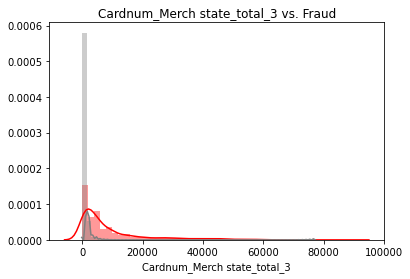

In [132]:
# Total
df_t2 = df[df['Cardnum_Merch state_total_3']<100000]
sns.distplot(df_t2[df_t2['Fraud']==1]['Cardnum_Merch state_total_3'],color='r')
sns.distplot(df_t2[df_t2['Fraud']==0]['Cardnum_Merch state_total_3'],color='grey')
plt.title('Cardnum_Merch state_total_3 vs. Fraud')

Text(0.5, 1.0, 'Cardnum_maximum_14 vs. Fraud')

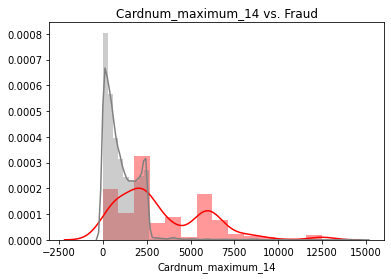

In [133]:
# Maximum
df_m = df[df['Cardnum_maximum_14']<15000]
sns.distplot(df_m[df_m['Fraud']==1]['Cardnum_maximum_14'],color='r')
sns.distplot(df_m[df_m['Fraud']==0]['Cardnum_maximum_14'],color='grey')
plt.title('Cardnum_maximum_14 vs. Fraud')

## Model Building

In [159]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import itertools
import time

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

import warnings 
warnings.filterwarnings("ignore")

In [134]:
df = data[features]

In [135]:
train_test = df.loc[(df['Date']<'2010-11-01')&(df['Date']>'2010-01-14')]
oot = df.loc[df['Date']>='2010-11-01']

In [136]:
train_test.drop('Date', axis=1,inplace=True)
oot.drop('Date',axis=1,inplace=True)

In [140]:
train_test.shape

(80632, 32)

In [141]:
oot.shape

(12427, 32)

In [143]:
features= ['Date', 
'Fraud',
'Cardnum_Merch zip_total_7',
'Cardnum_Merchnum_total_7',
'Cardnum_Merchnum_total_14',
'Cardnum_Merch state_total_3',
'Cardnum_Merch description_total_14',
'Cardnum_Merch zip_total_14',
'Cardnum_Merch state_total_1',
'Cardnum_Merchnum_total_30',
'Cardnum_Merch state_total_14',
'Cardnum_Merch description_total_1',
'Cardnum_Merch zip_total_30',
'Cardnum_Merch description_maximum_14',
'Cardnum_Merch description_total_0',
'Cardnum_Merch description_maximum_3',
'Cardnum_Merch description_maximum_7',
'Cardnum_Merch description_maximum_30',
'Cardnum_Merch state_maximum_14',
'Cardnum_Merch zip_maximum_3',
'Cardnum_total_7',
'Merch description_total_1',
'Cardnum_Merch state_total_30',
'Merchnum_maximum_0',
'Cardnum_total_0',
'Cardnum_Merch description_maximum_0',
'Cardnum_maximum_7',
'Cardnum_maximum_1',
'Merch description_total_7',
'Cardnum_Merch zip_average_30',
'Cardnum_maximum_14',
'Merchnum_average_0']

### Logistic Regression

In [144]:
niter=10

In [145]:
error=pd.DataFrame(index=range(niter*6),columns=['num','tst','trn','oot'])
j=0
for i in range(niter):
    print(f'iterate {i} times')
    print('n\ttrain\t test\t OOT')
    for n in [5,10,15,20,25,30]:
        feature_selected = features[2:n+2]
        X = train_test[feature_selected].values
        y = train_test['Fraud'].values
        X_oot=oot[feature_selected].values
        y_oot = oot['Fraud'].values
        SS = StandardScaler()
        X = SS.fit_transform(X)
        X_oot = SS.transform(X_oot)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        model = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=5000,random_state=1)
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_oot_pred = model.predict(X_oot)
        error.loc[j,'num']=n
        error.loc[j,'trn']=round(roc_auc_score(y_train, y_train_pred),3)
        error.loc[j,'tst']=round(roc_auc_score(y_test, y_test_pred),3)
        error.loc[j,'oot']=round(roc_auc_score(y_oot, y_oot_pred),3)
        j+=1
        print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
n	train	 test	 OOT
5	0.838	0.829	0.75
10	0.843	0.831	0.765
15	0.846	0.832	0.765
20	0.883	0.858	0.791
25	0.887	0.861	0.786
30	0.891	0.862	0.79
iterate 1 times
n	train	 test	 OOT
5	0.836	0.835	0.749
10	0.84	0.833	0.767
15	0.841	0.836	0.786
20	0.883	0.853	0.796
25	0.887	0.856	0.796
30	0.89	0.859	0.801
iterate 2 times
n	train	 test	 OOT
5	0.833	0.837	0.752
10	0.837	0.846	0.733
15	0.836	0.842	0.739
20	0.881	0.861	0.793
25	0.884	0.86	0.782
30	0.886	0.872	0.784
iterate 3 times
n	train	 test	 OOT
5	0.83	0.841	0.758
10	0.833	0.846	0.768
15	0.834	0.854	0.784
20	0.869	0.88	0.801
25	0.875	0.881	0.789
30	0.878	0.884	0.797
iterate 4 times
n	train	 test	 OOT
5	0.835	0.839	0.761
10	0.839	0.848	0.767
15	0.84	0.853	0.78
20	0.873	0.883	0.8
25	0.876	0.884	0.792
30	0.883	0.882	0.791
iterate 5 times
n	train	 test	 OOT
5	0.837	0.835	0.756
10	0.841	0.837	0.766
15	0.843	0.839	0.781
20	0.874	0.869	0.787
25	0.878	0.877	0.784
30	0.881	0.883	0.786
iterate 6 times
n	train	 test	 OOT
5	0.837	0.836	0.

In [147]:
FDR3=pd.DataFrame(index=range(niter*6),columns=['num','tst','trn','oot'])
j=0
for i in range(niter):
    print(f'iterate {i} times')
    print('FDR@3%:')
    print('n\ttrain\t test\t OOT')
    for n in [5,10,15,20,25,30]:
        feature_selected = features[2:n+2]
        X = train_test.loc[:,feature_selected].values
        y = train_test.loc[:,'Fraud'].values
        X_oot = oot.loc[:,feature_selected].values
        y_oot = oot.loc[:,'Fraud'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
        model = LogisticRegression(penalty='l2',class_weight='balanced',max_iter=5000,random_state=1)
        model.fit(X_train, y_train)
    
  
        y_train_prob = model.predict_proba(X_train)[:,1]
        y_test_prob = model.predict_proba(X_test)[:,1]
        y_oot_prob = model.predict_proba(X_oot)[:,1]
    
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_oot_pred = model.predict(X_oot)
    
        train_fdr = pd.DataFrame({'y_train_prob':y_train_prob,'y_train_pred':y_train_pred,'y_train':y_train})
        train_fdr = train_fdr.sort_values('y_train_prob', ascending=False)
        train_numbads = len(train_fdr.loc[train_fdr['y_train']==1])
        train_top_rows = int(round(len(train_fdr)*0.03))
        train_head = train_fdr.head(train_top_rows)
        train_needed = len(train_head.loc[train_head['y_train']==1])
        train_fdr_val = train_needed/train_numbads
        FDR3.loc[j,'num']=n
        FDR3.loc[j,'trn']=train_fdr_val 
      
        test_fdr = pd.DataFrame({'y_test_prob':y_test_prob,'y_test_pred':y_test_pred,'y_test':y_test})
        test_fdr = test_fdr.sort_values('y_test_prob', ascending=False)
        test_numbads = len(test_fdr.loc[test_fdr['y_test']==1])
        test_top_rows = int(round(len(test_fdr)*0.03))
        test_head = test_fdr.head(test_top_rows)
        test_needed = len(test_head.loc[test_head['y_test']==1])
        test_fdr_val = test_needed/test_numbads
        FDR3.loc[j,'tst']=test_fdr_val
    
        oot_fdr = pd.DataFrame({'y_oot_prob':y_oot_prob,'y_oot_pred':y_oot_pred,'y_oot':y_oot})
        oot_fdr = oot_fdr.sort_values('y_oot_prob', ascending=False)
        oot_numbads = len(oot_fdr.loc[oot_fdr['y_oot']==1])
        oot_top_rows = int(round(len(oot_fdr)*0.03))
        oot_head = oot_fdr.head(oot_top_rows)
        oot_needed = len(oot_head.loc[oot_head['y_oot']==1])
        oot_fdr_val = oot_needed/oot_numbads
        FDR3.loc[j,'oot']=oot_fdr_val 

        print(f'{n}\t{round(train_fdr_val,3)}\t{round(test_fdr_val,3)}\t{round(oot_fdr_val,3)}')
        j+=1
    #print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
FDR@3%:
n	train	 test	 OOT
5	0.653	0.623	0.408
10	0.658	0.608	0.346
15	0.668	0.608	0.419
20	0.706	0.65	0.469
25	0.709	0.654	0.508
30	0.722	0.665	0.48
iterate 1 times
FDR@3%:
n	train	 test	 OOT
5	0.65	0.638	0.397
10	0.655	0.642	0.374
15	0.651	0.635	0.43
20	0.699	0.681	0.458
25	0.706	0.681	0.464
30	0.72	0.696	0.464
iterate 2 times
FDR@3%:
n	train	 test	 OOT
5	0.653	0.635	0.374
10	0.658	0.638	0.313
15	0.655	0.638	0.402
20	0.706	0.662	0.436
25	0.714	0.673	0.419
30	0.73	0.673	0.408
iterate 3 times
FDR@3%:
n	train	 test	 OOT
5	0.65	0.65	0.352
10	0.64	0.658	0.385
15	0.645	0.662	0.486
20	0.676	0.7	0.497
25	0.678	0.708	0.52
30	0.696	0.7	0.503
iterate 4 times
FDR@3%:
n	train	 test	 OOT
5	0.627	0.692	0.38
10	0.627	0.692	0.391
15	0.633	0.685	0.48
20	0.676	0.708	0.464
25	0.681	0.715	0.492
30	0.701	0.735	0.48
iterate 5 times
FDR@3%:
n	train	 test	 OOT
5	0.638	0.658	0.408
10	0.643	0.658	0.341
15	0.653	0.65	0.436
20	0.691	0.692	0.397
25	0.697	0.696	0.441
30	0.715	0.704	0.425
iterate 6 

In [148]:
for num in error['num'].unique():
    print(num, 'features:')
    print('roc_score in training:',  round(error[error['num']==num]['trn'].mean(),4))
    print('roc_score in testing:',  round(error[error['num']==num]['tst'].mean(),4))
    print('roc_score in OOT:',round(error[error['num']==num]['oot'].mean(),4))

5 features:
roc_score in training: 0.835
roc_score in testing: 0.8368
roc_score in OOT: 0.7537
10 features:
roc_score in training: 0.8392
roc_score in testing: 0.8402
roc_score in OOT: 0.7633
15 features:
roc_score in training: 0.8404
roc_score in testing: 0.8418
roc_score in OOT: 0.7741
20 features:
roc_score in training: 0.8765
roc_score in testing: 0.8681
roc_score in OOT: 0.7928
25 features:
roc_score in training: 0.88
roc_score in testing: 0.8713
roc_score in OOT: 0.7869
30 features:
roc_score in training: 0.8837
roc_score in testing: 0.8752
roc_score in OOT: 0.7897


In [149]:
for num in FDR3['num'].unique():
    print(num, 'features:')
    print('FDR at 3% in training:', round(FDR3[FDR3['num']==num]['trn'].mean(),4))
    print('FDR at 3% in testing:',  round(FDR3[FDR3['num']==num]['tst'].mean(),4))
    print('FDR at 3% in OOT:', round(FDR3[FDR3['num']==num]['oot'].mean(),4))

5 features:
FDR at 3% in training: 0.6462
FDR at 3% in testing: 0.6442
FDR at 3% in OOT: 0.3872
10 features:
FDR at 3% in training: 0.648
FDR at 3% in testing: 0.6427
FDR at 3% in OOT: 0.3587
15 features:
FDR at 3% in training: 0.6518
FDR at 3% in testing: 0.6438
FDR at 3% in OOT: 0.4408
20 features:
FDR at 3% in training: 0.6924
FDR at 3% in testing: 0.6788
FDR at 3% in OOT: 0.4453
25 features:
FDR at 3% in training: 0.6977
FDR at 3% in testing: 0.685
FDR at 3% in OOT: 0.4682
30 features:
FDR at 3% in training: 0.7104
FDR at 3% in testing: 0.6954
FDR at 3% in OOT: 0.4525


### Random Forest

In [150]:
FDR3=pd.DataFrame(index=range(niter*18),columns=['num','trees','mtry','trn','tst','oot'])
k=0
for nite in range(niter):
    print(f'iterate {nite} times')
    print('FDR@3%:')
    print('num\t trees\t mtry \t train\t test\t OOT')
    for n in [20,25,30]:
        for i in [100,150,200]:
            for j in [5,10]:
                feature_selected = features[2:n+2]
                X = train_test[feature_selected].values
                y = train_test['Fraud'].values
                X_oot=oot[feature_selected].values
                y_oot = oot['Fraud'].values
                SS = StandardScaler()
                X = SS.fit_transform(X)
                X_oot = SS.transform(X_oot)
 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
                model = RandomForestClassifier(n_estimators=i,min_samples_leaf=3,max_features=j,max_depth=10) 
                model.fit(X_train, y_train)
    
    
 
                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)
                y_oot_pred=model.predict(X_oot)

                y_train_prob = model.predict_proba(X_train)[:,1]
                y_test_prob = model.predict_proba(X_test)[:,1]
                y_oot_prob = model.predict_proba(X_oot)[:,1]

                train_fdr = pd.DataFrame({'y_train_prob':y_train_prob,'y_train_pred':y_train_pred,'y_train':y_train}).sort_values('y_train_prob', ascending=False)
                train_numbads = len(train_fdr.loc[train_fdr['y_train']==1])
                train_top_rows = int(round(len(train_fdr)*0.03))
                train_head = train_fdr.head(train_top_rows)
                train_needed_0 = len(train_head.loc[train_head['y_train']==1])
                train_fdr_value = train_needed_0/train_numbads
                FDR3.loc[k,'num']=n
                FDR3.loc[k,'trees']=i
                FDR3.loc[k,'mtry']=j
                FDR3.loc[k,'trn']=train_fdr_value
      
                test_fdr = pd.DataFrame({'y_test_prob':y_test_prob,'y_test_pred':y_test_pred,'y_test':y_test}).sort_values('y_test_prob', ascending=False)
                test_numbads = len(test_fdr.loc[test_fdr['y_test']==1])
                test_top_rows = int(round(len(test_fdr)*0.03))
                test_head = test_fdr.head(test_top_rows)
                test_needed = len(test_head.loc[test_head['y_test']==1])
                test_fdr_value= test_needed/test_numbads
                FDR3.loc[k,'tst']=test_fdr_value
    
                oot_fdr = pd.DataFrame({'y_oot_prob':y_oot_prob,'y_oot_pred':y_oot_pred,'y_oot':y_oot}).sort_values('y_oot_prob', ascending=False)
                oot_numbads = len(oot_fdr.loc[oot_fdr['y_oot']==1])
                oot_top_rows = int(round(len(oot_fdr)*0.03))
                oot_head = oot_fdr.head(oot_top_rows)
                oot_needed = len(oot_head.loc[oot_head['y_oot']==1])
                oot_fdr_value = oot_needed/oot_numbads
                FDR3.loc[k,'oot']=oot_fdr_value

                print(f'{n}\t{i}\t{j}\t{round(train_fdr_value,3)}\t{round(test_fdr_value,3)}\t{round(oot_fdr_value,3)}')
                k+=1
    #print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
FDR@3%:
num	 trees	 mtry 	 train	 test	 OOT
20	100	5	0.891	0.796	0.609
20	100	10	0.888	0.808	0.598
20	150	5	0.885	0.85	0.631
20	150	10	0.867	0.842	0.637
20	200	5	0.885	0.831	0.626
20	200	10	0.885	0.838	0.642
25	100	5	0.887	0.804	0.592
25	100	10	0.89	0.8	0.587
25	150	5	0.88	0.865	0.631
25	150	10	0.87	0.842	0.609
25	200	5	0.885	0.85	0.62
25	200	10	0.885	0.85	0.592
30	100	5	0.888	0.815	0.592
30	100	10	0.88	0.804	0.581
30	150	5	0.882	0.873	0.592
30	150	10	0.877	0.862	0.609
30	200	5	0.896	0.862	0.62
30	200	10	0.88	0.85	0.587
iterate 1 times
FDR@3%:
num	 trees	 mtry 	 train	 test	 OOT
20	100	5	0.891	0.804	0.615
20	100	10	0.908	0.804	0.609
20	150	5	0.888	0.846	0.642
20	150	10	0.872	0.838	0.631
20	200	5	0.888	0.831	0.615
20	200	10	0.883	0.846	0.631
25	100	5	0.891	0.819	0.603
25	100	10	0.878	0.8	0.587
25	150	5	0.877	0.862	0.603
25	150	10	0.872	0.865	0.609
25	200	5	0.896	0.862	0.609
25	200	10	0.882	0.854	0.598
30	100	5	0.893	0.827	0.603
30	100	10	0.885	0.815	0.598
30	150	5	0.877	

In [151]:
FDR_rf=pd.DataFrame(index=range(18),columns=['num','trees','mtry','trn','tst','oot'])
i=0
for num in FDR3['num'].unique():
    for tree in FDR3['trees'].unique():
        for mtry in FDR3['mtry'].unique():
            print(num, 'features,', tree, 'trees,',mtry,'mtrys:')
            print('FDR at 3% in training:', round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['trn'].mean(),4))
            print('FDR at 3% in testing:',  round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['tst'].mean(),4))
            print('FDR at 3% in OOT:', round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['oot'].mean(),4))
            FDR_rf.loc[i,'num']=num
            FDR_rf.loc[i,'trees']=tree
            FDR_rf.loc[i,'mtry']=mtry
            FDR_rf.loc[i,'trn']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['trn'].mean(),4)
            FDR_rf.loc[i,'tst']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['tst'].mean(),4)
            FDR_rf.loc[i,'oot']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['oot'].mean(),4)
            i+=1

20 features, 100 trees, 5 mtrys:
FDR at 3% in training: 0.8924
FDR at 3% in testing: 0.8004
FDR at 3% in OOT: 0.6034
20 features, 100 trees, 10 mtrys:
FDR at 3% in training: 0.8896
FDR at 3% in testing: 0.8038
FDR at 3% in OOT: 0.6039
20 features, 150 trees, 5 mtrys:
FDR at 3% in training: 0.884
FDR at 3% in testing: 0.8477
FDR at 3% in OOT: 0.6324
20 features, 150 trees, 10 mtrys:
FDR at 3% in training: 0.8734
FDR at 3% in testing: 0.8454
FDR at 3% in OOT: 0.6341
20 features, 200 trees, 5 mtrys:
FDR at 3% in training: 0.8859
FDR at 3% in testing: 0.8319
FDR at 3% in OOT: 0.6268
20 features, 200 trees, 10 mtrys:
FDR at 3% in training: 0.8804
FDR at 3% in testing: 0.8373
FDR at 3% in OOT: 0.6341
25 features, 100 trees, 5 mtrys:
FDR at 3% in training: 0.8908
FDR at 3% in testing: 0.8104
FDR at 3% in OOT: 0.6011
25 features, 100 trees, 10 mtrys:
FDR at 3% in training: 0.8791
FDR at 3% in testing: 0.8019
FDR at 3% in OOT: 0.595
25 features, 150 trees, 5 mtrys:
FDR at 3% in training: 0.8799

In [152]:
FDR_rf

,num,trees,mtry,trn,tst,oot
0,20,100,5,0.8924,0.8004,0.6034
1,20,100,10,0.8896,0.8038,0.6039
2,20,150,5,0.884,0.8477,0.6324
3,20,150,10,0.8734,0.8454,0.6341
4,20,200,5,0.8859,0.8319,0.6268
5,20,200,10,0.8804,0.8373,0.6341
6,25,100,5,0.8908,0.8104,0.6011
7,25,100,10,0.8791,0.8019,0.595
8,25,150,5,0.8799,0.8635,0.6128
9,25,150,10,0.8719,0.8562,0.619


### Xgboost

In [153]:
niter_xgb=2
FDR_xgb=pd.DataFrame(index=range(niter_xgb*18),columns=['num','trees','mtry','trn','tst','oot'])
k=0
for i in range(niter_xgb):
    print(f'iterate {i} times')
    print('FDR@3%:')
    print('num\t trees\t mtry \t train\t test\t OOT')
    for n in [15,20,30]:
        for t in [200,300,400]:
            for j in [1,2]:
                feature_selected = features[2:n+2]
                X = train_test[feature_selected].values
                y = train_test['Fraud'].values
                X_oot=oot[feature_selected].values
                y_oot = oot['Fraud'].values
                SS = StandardScaler()
                X = SS.fit_transform(X)
                X_oot = SS.transform(X_oot)
 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
                model = XGBClassifier(learning_rate=0.1, n_estimators=t, max_depth=j, scale_pos_weight=92) 
                model.fit(X_train, y_train)
    
    

                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)
                y_oot_pred=model.predict(X_oot)

                y_train_prob = model.predict_proba(X_train)[:,1]
                y_test_prob = model.predict_proba(X_test)[:,1]
                y_oot_prob = model.predict_proba(X_oot)[:,1]

                train_fdr = pd.DataFrame({'y_train_prob':y_train_prob,'y_train_pred':y_train_pred,'y_train':y_train}).sort_values('y_train_prob', ascending=False)
                train_numbads = len(train_fdr.loc[train_fdr['y_train']==1])
                train_top_rows = int(round(len(train_fdr)*0.03))
                train_head = train_fdr.head(train_top_rows)
                train_needed_0 = len(train_head.loc[train_head['y_train']==1])
                train_fdr_value = train_needed_0/train_numbads
                FDR_xgb.loc[k,'num']=n
                FDR_xgb.loc[k,'trees']=t
                FDR_xgb.loc[k,'mtry']=j
                FDR_xgb.loc[k,'trn']=train_fdr_value
      
                test_fdr = pd.DataFrame({'y_test_prob':y_test_prob,'y_test_pred':y_test_pred,'y_test':y_test}).sort_values('y_test_prob', ascending=False)
                test_numbads = len(test_fdr.loc[test_fdr['y_test']==1])
                test_top_rows = int(round(len(test_fdr)*0.03))
                test_head = test_fdr.head(test_top_rows)
                test_needed = len(test_head.loc[test_head['y_test']==1])
                test_fdr_value= test_needed/test_numbads
                FDR_xgb.loc[k,'tst']=test_fdr_value
    
                oot_fdr = pd.DataFrame({'y_oot_prob':y_oot_prob,'y_oot_pred':y_oot_pred,'y_oot':y_oot}).sort_values('y_oot_prob', ascending=False)
                oot_numbads = len(oot_fdr.loc[oot_fdr['y_oot']==1])
                oot_top_rows = int(round(len(oot_fdr)*0.03))
                oot_head = oot_fdr.head(oot_top_rows)
                oot_needed = len(oot_head.loc[oot_head['y_oot']==1])
                oot_fdr_value = oot_needed/oot_numbads
                FDR_xgb.loc[k,'oot']=oot_fdr_value

                print(f'{n}\t{t}\t{j}\t{round(train_fdr_value,3)}\t{round(test_fdr_value,3)}\t{round(oot_fdr_value,3)}')
                k+=1
    #print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
FDR@3%:
num	 trees	 mtry 	 train	 test	 OOT
[12:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
15	200	1	0.714	0.692	0.402
[12:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
15	200	2	0.806	0.758	0.553
[12:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric

[12:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
20	200	1	0.765	0.719	0.525
[12:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
20	200	2	0.88	0.785	0.458
[12:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
20	300	1	0.799	0.

In [154]:
FDR_xgb2=pd.DataFrame(index=range(18),columns=['num','trees','mtry','trn','tst','oot'])
i=0
for num in FDR_xgb['num'].unique():
    for tree in FDR_xgb['trees'].unique():
        for mtry in FDR_xgb['mtry'].unique():
            print(num, 'features,', tree, 'trees,',mtry,'mtrys:')
            print('FDR at 3% in training:', round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['trn'].mean(),4))
            print('FDR at 3% in testing:',  round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['tst'].mean(),4))
            print('FDR at 3% in OOT:', round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['oot'].mean(),4))
            FDR_xgb2.loc[i,'num']=num
            FDR_xgb2.loc[i,'trees']=tree
            FDR_xgb2.loc[i,'mtry']=mtry
            FDR_xgb2.loc[i,'trn']=round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['trn'].mean(),4)
            FDR_xgb2.loc[i,'tst']=round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['tst'].mean(),4)
            FDR_xgb2.loc[i,'oot']=round(FDR_xgb[(FDR_xgb['num']==num)&(FDR_xgb['trees']==tree)&(FDR_xgb['mtry']==mtry)]['oot'].mean(),4)
            i+=1

15 features, 200 trees, 1 mtrys:
FDR at 3% in training: 0.713
FDR at 3% in testing: 0.6885
FDR at 3% in OOT: 0.419
15 features, 200 trees, 2 mtrys:
FDR at 3% in training: 0.8026
FDR at 3% in testing: 0.7385
FDR at 3% in OOT: 0.5363
15 features, 300 trees, 1 mtrys:
FDR at 3% in training: 0.7245
FDR at 3% in testing: 0.7019
FDR at 3% in OOT: 0.4665
15 features, 300 trees, 2 mtrys:
FDR at 3% in training: 0.8339
FDR at 3% in testing: 0.7538
FDR at 3% in OOT: 0.5335
15 features, 400 trees, 1 mtrys:
FDR at 3% in training: 0.7303
FDR at 3% in testing: 0.7038
FDR at 3% in OOT: 0.4721
15 features, 400 trees, 2 mtrys:
FDR at 3% in training: 0.8627
FDR at 3% in testing: 0.7538
FDR at 3% in OOT: 0.5363
20 features, 200 trees, 1 mtrys:
FDR at 3% in training: 0.7681
FDR at 3% in testing: 0.7115
FDR at 3% in OOT: 0.4944
20 features, 200 trees, 2 mtrys:
FDR at 3% in training: 0.8824
FDR at 3% in testing: 0.7904
FDR at 3% in OOT: 0.4721
20 features, 300 trees, 1 mtrys:
FDR at 3% in training: 0.801
FDR 

In [155]:
FDR_xgb2

,num,trees,mtry,trn,tst,oot
0,15,200,1,0.713,0.6885,0.419
1,15,200,2,0.8026,0.7385,0.5363
2,15,300,1,0.7245,0.7019,0.4665
3,15,300,2,0.8339,0.7538,0.5335
4,15,400,1,0.7303,0.7038,0.4721
5,15,400,2,0.8627,0.7538,0.5363
6,20,200,1,0.7681,0.7115,0.4944
7,20,200,2,0.8824,0.7904,0.4721
8,20,300,1,0.801,0.7346,0.4972
9,20,300,2,0.9161,0.8135,0.5279


### Adaboost

In [156]:
niter_ada=2
FDR_ada=pd.DataFrame(index=range(niter_ada*18),columns=['num','trees','learning','trn','tst','oot'])
k=0
for i in range(niter_ada):
    print(f'iterate {i} times')
    print('FDR@3%:')
    print('num\t trees\t learning \t train\t test\t OOT')
    for n in [15,20,30]:
        for t in [40,50,60]:
            for j in [0.7,1]:
                feature_selected = features[2:n+2]
                X = train_test[feature_selected].values
                y = train_test['Fraud'].values
                X_oot=oot[feature_selected].values
                y_oot = oot['Fraud'].values
                SS = StandardScaler()
                X = SS.fit_transform(X)
                X_oot = SS.transform(X_oot)
 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
                model = AdaBoostClassifier(n_estimators=t, learning_rate=j)
                model.fit(X_train, y_train)
    

                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)
                y_oot_pred=model.predict(X_oot)

                y_train_prob = model.predict_proba(X_train)[:,1]
                y_test_prob = model.predict_proba(X_test)[:,1]
                y_oot_prob = model.predict_proba(X_oot)[:,1]

                train_fdr = pd.DataFrame({'y_train_prob':y_train_prob,'y_train_pred':y_train_pred,'y_train':y_train}).sort_values('y_train_prob', ascending=False)
                train_numbads = len(train_fdr.loc[train_fdr['y_train']==1])
                train_top_rows = int(round(len(train_fdr)*0.03))
                train_head = train_fdr.head(train_top_rows)
                train_needed_0 = len(train_head.loc[train_head['y_train']==1])
                train_fdr_value = train_needed_0/train_numbads
                FDR_ada.loc[k,'num']=n
                FDR_ada.loc[k,'trees']=t
                FDR_ada.loc[k,'mtry']=j
                FDR_ada.loc[k,'trn']=train_fdr_value
      
                test_fdr = pd.DataFrame({'y_test_prob':y_test_prob,'y_test_pred':y_test_pred,'y_test':y_test}).sort_values('y_test_prob', ascending=False)
                test_numbads = len(test_fdr.loc[test_fdr['y_test']==1])
                test_top_rows = int(round(len(test_fdr)*0.03))
                test_head = test_fdr.head(test_top_rows)
                test_needed = len(test_head.loc[test_head['y_test']==1])
                test_fdr_value= test_needed/test_numbads
                FDR_ada.loc[k,'tst']=test_fdr_value
    
                oot_fdr = pd.DataFrame({'y_oot_prob':y_oot_prob,'y_oot_pred':y_oot_pred,'y_oot':y_oot}).sort_values('y_oot_prob', ascending=False)
                oot_numbads = len(oot_fdr.loc[oot_fdr['y_oot']==1])
                oot_top_rows = int(round(len(oot_fdr)*0.03))
                oot_head = oot_fdr.head(oot_top_rows)
                oot_needed = len(oot_head.loc[oot_head['y_oot']==1])
                oot_fdr_value = oot_needed/oot_numbads
                FDR_ada.loc[k,'oot']=oot_fdr_value

                print(f'{n}\t{t}\t{j}\t{round(train_fdr_value,3)}\t{round(test_fdr_value,3)}\t{round(oot_fdr_value,3)}')
                k+=1
    #print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
FDR@3%:
num	 trees	 learning 	 train	 test	 OOT
15	40	0.7	0.707	0.669	0.352
15	40	1	0.706	0.662	0.458
15	50	0.7	0.709	0.673	0.369
15	50	1	0.724	0.685	0.492
15	60	0.7	0.712	0.677	0.385
15	60	1	0.73	0.696	0.458
20	40	0.7	0.765	0.688	0.419
20	40	1	0.793	0.704	0.525
20	50	0.7	0.78	0.704	0.425
20	50	1	0.798	0.712	0.464
20	60	0.7	0.78	0.704	0.425
20	60	1	0.801	0.715	0.441
30	40	0.7	0.778	0.723	0.38
30	40	1	0.809	0.738	0.335
30	50	0.7	0.806	0.738	0.391
30	50	1	0.824	0.754	0.346
30	60	0.7	0.826	0.735	0.43
30	60	1	0.845	0.785	0.33
iterate 1 times
FDR@3%:
num	 trees	 learning 	 train	 test	 OOT
15	40	0.7	0.715	0.688	0.408
15	40	1	0.724	0.692	0.514
15	50	0.7	0.711	0.688	0.408
15	50	1	0.722	0.696	0.497
15	60	0.7	0.72	0.681	0.413
15	60	1	0.725	0.704	0.464
20	40	0.7	0.748	0.715	0.492
20	40	1	0.773	0.727	0.436
20	50	0.7	0.76	0.731	0.48
20	50	1	0.788	0.735	0.458
20	60	0.7	0.789	0.758	0.469
20	60	1	0.799	0.735	0.43
30	40	0.7	0.796	0.735	0.514
30	40	1	0.799	0.754	0.369
30	50	0.7	0.809	0.

In [157]:
FDR_ada2=pd.DataFrame(index=range(18),columns=['num','trees','mtry','trn','tst','oot'])
i=0
for num in FDR_ada['num'].unique():
    for tree in FDR_ada['trees'].unique():
        for mtry in FDR_ada['mtry'].unique():
            print(num, 'features,', tree, 'trees,',mtry,'mtrys:')
            print('FDR at 3% in training:', round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['trn'].mean(),4))
            print('FDR at 3% in testing:',  round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['tst'].mean(),4))
            print('FDR at 3% in OOT:', round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['oot'].mean(),4))
            FDR_ada2.loc[i,'num']=num
            FDR_ada2.loc[i,'trees']=tree
            FDR_ada2.loc[i,'mtry']=mtry
            FDR_ada2.loc[i,'trn']=round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['trn'].mean(),4)
            FDR_ada2.loc[i,'tst']=round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['tst'].mean(),4)
            FDR_ada2.loc[i,'oot']=round(FDR_ada[(FDR_ada['num']==num)&(FDR_ada['trees']==tree)&(FDR_ada['mtry']==mtry)]['oot'].mean(),4)
            i+=1

15 features, 40 trees, 0.7 mtrys:
FDR at 3% in training: 0.7113
FDR at 3% in testing: 0.6788
FDR at 3% in OOT: 0.3799
15 features, 40 trees, 1.0 mtrys:
FDR at 3% in training: 0.7146
FDR at 3% in testing: 0.6769
FDR at 3% in OOT: 0.486
15 features, 50 trees, 0.7 mtrys:
FDR at 3% in training: 0.7097
FDR at 3% in testing: 0.6808
FDR at 3% in OOT: 0.3883
15 features, 50 trees, 1.0 mtrys:
FDR at 3% in training: 0.7229
FDR at 3% in testing: 0.6904
FDR at 3% in OOT: 0.4944
15 features, 60 trees, 0.7 mtrys:
FDR at 3% in training: 0.7163
FDR at 3% in testing: 0.6788
FDR at 3% in OOT: 0.3994
15 features, 60 trees, 1.0 mtrys:
FDR at 3% in training: 0.7278
FDR at 3% in testing: 0.7
FDR at 3% in OOT: 0.4609
20 features, 40 trees, 0.7 mtrys:
FDR at 3% in training: 0.7566
FDR at 3% in testing: 0.7019
FDR at 3% in OOT: 0.4553
20 features, 40 trees, 1.0 mtrys:
FDR at 3% in training: 0.7829
FDR at 3% in testing: 0.7154
FDR at 3% in OOT: 0.4804
20 features, 50 trees, 0.7 mtrys:
FDR at 3% in training: 0.7

### Light GBM

In [160]:
FDR3=pd.DataFrame(index=range(niter*24),columns=['num','trees','mtry','tst','trn','oot'])
k=0
for nite in range(niter):
    print(f'iterate {nite} times')
    print('FDR@3%:')
    print('num\t n_estimators\t min_child_sample \t train\t test\t OOT')
    for n in [20,25,30]:
        for i in [50,100,150,200]:
            for j in [5,10]:
                feature_selected = features[2:n+2]
                X = train_test[feature_selected].values
                y = train_test['Fraud'].values
                X_oot=oot[feature_selected].values
                y_oot = oot['Fraud'].values
                SS = StandardScaler()
                X = SS.fit_transform(X)
                X_oot = SS.transform(X_oot)
 
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
                model = LGBMClassifier(num_leaves=2**2-1, learning_rate=0.05, n_estimators=i, max_depth= 3,min_child_samples=j)
                model.fit(X_train, y_train)
    
    

                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)
                y_oot_pred=model.predict(X_oot)

                y_train_prob = model.predict_proba(X_train)[:,1]
                y_test_prob = model.predict_proba(X_test)[:,1]
                y_oot_prob = model.predict_proba(X_oot)[:,1]

                train_fdr = pd.DataFrame({'y_train_prob':y_train_prob,'y_train_pred':y_train_pred,'y_train':y_train}).sort_values('y_train_prob', ascending=False)
                train_numbads = len(train_fdr.loc[train_fdr['y_train']==1])
                train_top_rows = int(round(len(train_fdr)*0.03))
                train_head = train_fdr.head(train_top_rows)
                train_needed_0 = len(train_head.loc[train_head['y_train']==1])
                train_fdr_value = train_needed_0/train_numbads
                FDR3.loc[k,'num']=n
                FDR3.loc[k,'trees']=i
                FDR3.loc[k,'mtry']=j
                FDR3.loc[k,'trn']=train_fdr_value
      
                test_fdr = pd.DataFrame({'y_test_prob':y_test_prob,'y_test_pred':y_test_pred,'y_test':y_test}).sort_values('y_test_prob', ascending=False)
                test_numbads = len(test_fdr.loc[test_fdr['y_test']==1])
                test_top_rows = int(round(len(test_fdr)*0.03))
                test_head = test_fdr.head(test_top_rows)
                test_needed = len(test_head.loc[test_head['y_test']==1])
                test_fdr_value= test_needed/test_numbads
                FDR3.loc[k,'tst']=test_fdr_value
    
                oot_fdr = pd.DataFrame({'y_oot_prob':y_oot_prob,'y_oot_pred':y_oot_pred,'y_oot':y_oot}).sort_values('y_oot_prob', ascending=False)
                oot_numbads = len(oot_fdr.loc[oot_fdr['y_oot']==1])
                oot_top_rows = int(round(len(oot_fdr)*0.03))
                oot_head = oot_fdr.head(oot_top_rows)
                oot_needed = len(oot_head.loc[oot_head['y_oot']==1])
                oot_fdr_value = oot_needed/oot_numbads
                FDR3.loc[k,'oot']=oot_fdr_value

                print(f'{n}\t{i}\t{j}\t{round(train_fdr_value,3)}\t{round(test_fdr_value,3)}\t{round(oot_fdr_value,3)}')
                k+=1
    #print(f'{n}\t{round(roc_auc_score(y_train, y_train_pred),3)}\t{round(roc_auc_score(y_test, y_test_pred),3)}\t{round(roc_auc_score(y_oot, y_oot_pred),3)}')

iterate 0 times
FDR@3%:
num	 n_estimators	 min_child_sample 	 train	 test	 OOT
20	50	5	0.727	0.754	0.469
20	50	10	0.727	0.754	0.469
20	100	5	0.781	0.742	0.447
20	100	10	0.77	0.738	0.447
20	150	5	0.778	0.792	0.531
20	150	10	0.785	0.792	0.559
20	200	5	0.811	0.796	0.508
20	200	10	0.809	0.792	0.497
25	50	5	0.752	0.731	0.514
25	50	10	0.752	0.731	0.514
25	100	5	0.788	0.746	0.464
25	100	10	0.788	0.746	0.464
25	150	5	0.811	0.804	0.508
25	150	10	0.811	0.808	0.52
25	200	5	0.821	0.792	0.52
25	200	10	0.817	0.8	0.52
30	50	5	0.755	0.754	0.531
30	50	10	0.755	0.754	0.531
30	100	5	0.796	0.762	0.464
30	100	10	0.798	0.765	0.464
30	150	5	0.821	0.838	0.547
30	150	10	0.811	0.831	0.547
30	200	5	0.842	0.823	0.469
30	200	10	0.836	0.815	0.486
iterate 1 times
FDR@3%:
num	 n_estimators	 min_child_sample 	 train	 test	 OOT
20	50	5	0.727	0.754	0.469
20	50	10	0.727	0.754	0.469
20	100	5	0.781	0.742	0.447
20	100	10	0.77	0.738	0.447
20	150	5	0.778	0.792	0.531
20	150	10	0.785	0.792	0.559
20	200	5	0.811	0.796	0.508
20	20

In [161]:
FDR_lgb=pd.DataFrame(index=range(24),columns=['num','trees','mtry','tst','trn','oot'])
i=0
for num in FDR3['num'].unique():
    for tree in FDR3['trees'].unique():
        for mtry in FDR3['mtry'].unique():
            print(num, 'features,', tree, 'trees,',mtry,'mtrys:')
            print('FDR at 3% in training:', round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['trn'].mean(),4))
            print('FDR at 3% in testing:',  round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['tst'].mean(),4))
            print('FDR at 3% in OOT:', round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['oot'].mean(),4))
            FDR_lgb.loc[i,'num']=num
            FDR_lgb.loc[i,'trees']=tree
            FDR_lgb.loc[i,'mtry']=mtry
            FDR_lgb.loc[i,'trn']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['trn'].mean(),4)
            FDR_lgb.loc[i,'tst']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['tst'].mean(),4)
            FDR_lgb.loc[i,'oot']=round(FDR3[(FDR3['num']==num)&(FDR3['trees']==tree)&(FDR3['mtry']==mtry)]['oot'].mean(),4)
            i+=1

20 features, 50 trees, 5 mtrys:
FDR at 3% in training: 0.727
FDR at 3% in testing: 0.7538
FDR at 3% in OOT: 0.4693
20 features, 50 trees, 10 mtrys:
FDR at 3% in training: 0.727
FDR at 3% in testing: 0.7538
FDR at 3% in OOT: 0.4693
20 features, 100 trees, 5 mtrys:
FDR at 3% in training: 0.7812
FDR at 3% in testing: 0.7423
FDR at 3% in OOT: 0.4469
20 features, 100 trees, 10 mtrys:
FDR at 3% in training: 0.7697
FDR at 3% in testing: 0.7385
FDR at 3% in OOT: 0.4469
20 features, 150 trees, 5 mtrys:
FDR at 3% in training: 0.778
FDR at 3% in testing: 0.7923
FDR at 3% in OOT: 0.5307
20 features, 150 trees, 10 mtrys:
FDR at 3% in training: 0.7845
FDR at 3% in testing: 0.7923
FDR at 3% in OOT: 0.5587
20 features, 200 trees, 5 mtrys:
FDR at 3% in training: 0.8109
FDR at 3% in testing: 0.7962
FDR at 3% in OOT: 0.5084
20 features, 200 trees, 10 mtrys:
FDR at 3% in training: 0.8092
FDR at 3% in testing: 0.7923
FDR at 3% in OOT: 0.4972
25 features, 50 trees, 5 mtrys:
FDR at 3% in training: 0.7516
FDR

### Neural Net

In [173]:
X = train_test.iloc[:,2:].values
y = train_test['Fraud'].values
X_oot = oot.iloc[:,2:].values
y_oot = oot['Fraud'].values

In [175]:
model = StandardScaler()
X = model.fit_transform(X)
X_oot = model.transform(X_oot)

In [176]:
node_list = []
epoch_list = []
niter_list = []
training_list = []
testing_list = []
oot_list = []

for hidden_layer_size in [(5),(10),(15),(20)]:
    for epoch in [20,50]:
        for niter in range(1,11):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
            model=MLPClassifier(solver='adam', 
                                activation='logistic',
                                alpha=1e-4,
                                hidden_layer_sizes=hidden_layer_size, 
                                max_iter=epoch,
                                verbose=0,
                                tol=1e-5,
                                learning_rate='adaptive',
                                learning_rate_init=.2)
            model.fit(X_train, y_train)
            niter_list.append(niter)
            node_list.append(hidden_layer_size)
            epoch_list.append(epoch)
            training_list.append(round(fdr(model, X_train, y_train),4))
            testing_list.append(round(fdr(model, X_test, y_test),4))
            oot_list.append(round(fdr(model, X_oot, y_oot),4)) 

In [177]:
result = pd.DataFrame({'Node':node_list, 'Epoch':epoch_list,'niter':niter_list, 'Training FDR':training_list, 'Testing FDR':testing_list, 'OOT FDR': oot_list})
result

,Node,Epoch,niter,Training FDR,Testing FDR,OOT FDR
0,5,20,1,0.6661,0.6808,0.4916
1,5,20,2,0.7451,0.6923,0.6145
2,5,20,3,0.6513,0.6808,0.3017
3,5,20,4,0.7105,0.6462,0.4860
4,5,20,5,0.6414,0.6692,0.3911
...,...,...,...,...,...,...
75,20,50,6,0.7237,0.7077,0.4469
76,20,50,7,0.7105,0.6846,0.5531
77,20,50,8,0.7138,0.7538,0.5475
78,20,50,9,0.7105,0.6577,0.4581


In [178]:
result_mean = result.groupby(['Node','Epoch']).mean().reset_index()
result1 = result_mean.loc[result_mean['Epoch']==20]
result2 = result_mean.loc[result_mean['Epoch']==50]
result1

,Node,Epoch,niter,Training FDR,Testing FDR,OOT FDR
0,5,20,5.5,0.66512,0.65462,0.45587
2,10,20,5.5,0.67664,0.66461,0.49776
4,15,20,5.5,0.68437,0.68653,0.52181
6,20,20,5.5,0.68865,0.69270,0.48156


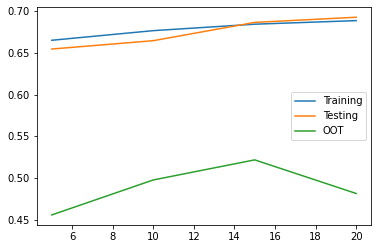

In [179]:
plt.plot(result1['Node'],result1['Training FDR'],label='Training')
plt.plot(result1['Node'],result1['Testing FDR'],label='Testing')
plt.plot(result1['Node'],result1['OOT FDR'],label='OOT')
plt.legend()

In [180]:
result2

,Node,Epoch,niter,Training FDR,Testing FDR,OOT FDR
1,5,50,5.5,0.68995,0.68578,0.53296
3,10,50,5.5,0.69901,0.67575,0.48044
5,15,50,5.5,0.67746,0.67115,0.49497
7,20,50,5.5,0.71826,0.70538,0.52122


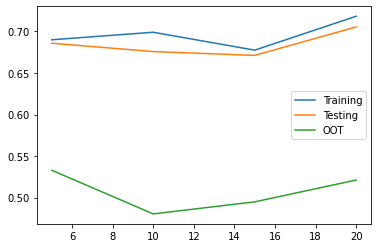

In [181]:
plt.plot(result2['Node'],result2['Training FDR'],label='Training')
plt.plot(result2['Node'],result2['Testing FDR'],label='Testing')
plt.plot(result2['Node'],result2['OOT FDR'],label='OOT')
plt.legend()

### KNN

In [21]:
k_list = []
p_list = []
niter_list = []
training_list = []
testing_list = []
oot_list = []

for k in range(5,51,5):
    for p in [1,2]:
        for niter in range(1,6):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
            model = KNeighborsClassifier(n_neighbors=k,p=p)
            model.fit(X_train, y_train)
            niter_list.append(niter)
            k_list.append(k)
            p_list.append(p)
            training_list.append(round(fdr(model, X_train, y_train),4))
            testing_list.append(round(fdr(model, X_test, y_test),4))
            oot_list.append(round(fdr(model, X_oot, y_oot),4)) 

In [22]:
result = pd.DataFrame({'K':k_list, 'p':p_list,'niter':niter_list, 'Training FDR':training_list, 'Testing FDR':testing_list, 'OOT FDR': oot_list})
result

,K,p,niter,Training FDR,Testing FDR,OOT FDR
0,5,1,1,1.0000,0.8038,0.3631
1,5,1,2,1.0000,0.8154,0.3464
2,5,1,3,1.0000,0.8462,0.3743
3,5,1,4,1.0000,0.8038,0.3464
4,5,1,5,1.0000,0.8385,0.4246
...,...,...,...,...,...,...
95,50,2,1,0.8766,0.8462,0.5363
96,50,2,2,0.8766,0.8308,0.5196
97,50,2,3,0.8750,0.8423,0.5419
98,50,2,4,0.8701,0.8269,0.5251


In [23]:
result_mean = result.groupby(['K','p']).mean().reset_index()
result1 = result_mean.loc[result_mean['p']==1]
result2 = result_mean.loc[result_mean['p']==2]
result1

,K,p,niter,Training FDR,Testing FDR,OOT FDR
0,5,1,3,1.00000,0.82154,0.37096
2,10,1,3,0.97662,0.82922,0.45140
4,15,1,3,0.93520,0.81460,0.49722
6,20,1,3,0.90920,0.85308,0.50726
8,25,1,3,0.89934,0.85000,0.50168
10,30,1,3,0.89146,0.85308,0.52514
12,35,1,3,0.88752,0.84230,0.52290
14,40,1,3,0.88848,0.82694,0.50616
16,45,1,3,0.88028,0.83922,0.52180
18,50,1,3,0.87830,0.84308,0.52290


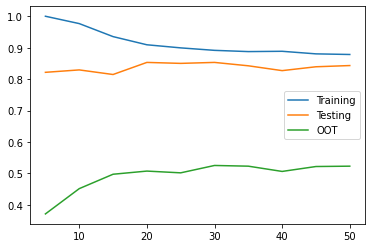

In [24]:
plt.plot(result1['K'],result1['Training FDR'],label='Training')
plt.plot(result1['K'],result1['Testing FDR'],label='Testing')
plt.plot(result1['K'],result1['OOT FDR'],label='OOT')
plt.legend()

In [25]:
result2

,K,p,niter,Training FDR,Testing FDR,OOT FDR
1,5,2,3,1.00000,0.83154,0.32624
3,10,2,3,0.97532,0.85384,0.42122
5,15,2,3,0.93454,0.84460,0.44358
7,20,2,3,0.91414,0.86232,0.47708
9,25,2,3,0.92008,0.84078,0.50506
11,30,2,3,0.89966,0.86078,0.52848
13,35,2,3,0.88882,0.85306,0.54078
15,40,2,3,0.88390,0.83770,0.52626
17,45,2,3,0.87764,0.85614,0.52848
19,50,2,3,0.87334,0.83924,0.52402


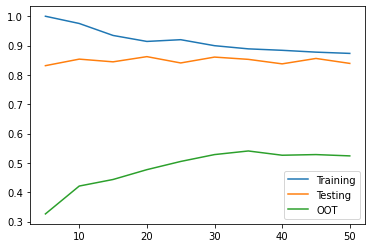

In [26]:
plt.plot(result2['K'],result2['Training FDR'],label='Training')
plt.plot(result2['K'],result2['Testing FDR'],label='Testing')
plt.plot(result2['K'],result2['OOT FDR'],label='OOT')
plt.legend()

## XGBoost Hyper-parameters Tuning

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [184]:
model = XGBClassifier(n_estimators=100, max_depth=1,eval_metric=fdr,min_child_weight = 1,gamma=0)

learning_rate = [0.01,0.1,0.2]
subsample = [0.5, 0.8]
colsample_bytree = [0.5, 0.8] 

hyperF = dict(subsample = subsample, colsample_bytree = colsample_bytree, learning_rate=learning_rate)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1,scoring=fdr)
bestF = gridF.fit(X[:,:20], y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   59.9s finished


[00:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [185]:
gridF.best_params_

{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'subsample': 0.8}

In [186]:
gridF.cv_results_['mean_test_score']

array([0.63941455, 0.6463111 , 0.64514577, 0.648602  , 0.65667581,
       0.65551843, 0.64402816, 0.64287078, 0.648602  , 0.64744859,
       0.65437299, 0.65897069])

In [187]:
model = XGBClassifier(learning_rate=0.2,
                        n_estimators=100,         
                        max_depth=3,               
                        min_child_weight = 1,     
                        gamma=0,                  
                        subsample=0.8,            
                        colsample_bytree=0.5,       
                        #scale_pos_weight=1,       
                        random_state=1,           
                        eval_metric=fdr)
model.fit(X_train[:,:20], y_train)

print('Train:',fdr(model, X_train[:,:20], y_train))
print('Test:',fdr(model, X_test[:,:20], y_test))
print('OOT:',fdr(model, X_oot[:,:20], y_oot))

[00:03:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train: 0.9161184210526315
Test: 0.85
OOT: 0.6424581005586593


Text(0.5, 1.0, 'Feature Importance')

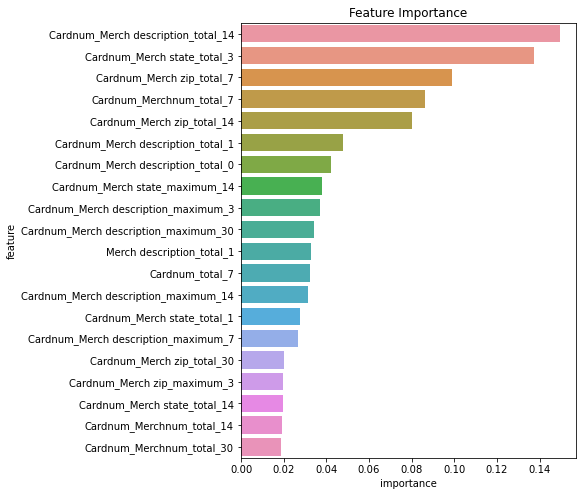

In [189]:
importance = pd.DataFrame({'feature':df.columns[3:23],'importance':model.feature_importances_}).\
                sort_values(by='importance', ascending=False)
plt.figure(figsize=(6,8))
sns.barplot( importance['importance'],importance['feature'])
plt.title('Feature Importance')

## FDR Tables

In [190]:
proba = model.predict_proba(X_train[:,:20])[:,1]
bin_df = pd.DataFrame({'proba':proba, 'true':y_train})
bin_df = bin_df.sort_values(by='proba', ascending=False)
group_num = int(len(bin_df)/100)
bin_df = bin_df.reset_index().drop('index', axis=1)

i = 0
rec = []
goods = []
bads = []

while i <= len(bin_df):
    pop = bin_df.loc[i:i+group_num-1]
    rec.append(len(pop))
    goods.append(len(pop.loc[pop['true']==0]))
    bads.append(len(pop.loc[pop['true']==1]))
    i+=group_num
result_train = pd.DataFrame({'# Records':rec,'# Goods':goods,'# Bads':bads})
result_train

,# Records,# Goods,# Bads
0,564,93,471
1,564,495,69
2,564,547,17
3,564,548,16
4,564,560,4
...,...,...,...
96,564,564,0
97,564,564,0
98,564,564,0
99,564,564,0


In [191]:
proba = model.predict_proba(X_test[:,:20])[:,1]
bin_df = pd.DataFrame({'proba':proba, 'true':y_test})
bin_df = bin_df.sort_values(by='proba', ascending=False)
group_num = int(len(bin_df)/100)
bin_df = bin_df.reset_index().drop('index', axis=1)

i = 0
rec = []
goods = []
bads = []

while i <= len(bin_df):
    pop = bin_df.loc[i:i+group_num-1]
    rec.append(len(pop))
    goods.append(len(pop.loc[pop['true']==0]))
    bads.append(len(pop.loc[pop['true']==1]))
    i+=group_num
result_test = pd.DataFrame({'# Records':rec,'# Goods':goods,'# Bads':bads})
result_test

,# Records,# Goods,# Bads
0,241,71,170
1,241,207,34
2,241,224,17
3,241,230,11
4,241,235,6
...,...,...,...
96,241,241,0
97,241,241,0
98,241,241,0
99,241,241,0


In [192]:
proba = model.predict_proba(X_oot[:,:20])[:,1]
bin_df = pd.DataFrame({'proba':proba, 'true':y_oot})
bin_df = bin_df.sort_values(by='proba', ascending=False)
group_num = int(len(bin_df)/100)
bin_df = bin_df.reset_index().drop('index', axis=1)

i = 0
rec = []
goods = []
bads = []

while i <= len(bin_df):
    pop = bin_df.loc[i:i+group_num-1]
    rec.append(len(pop))
    goods.append(len(pop.loc[pop['true']==0]))
    bads.append(len(pop.loc[pop['true']==1]))
    i+=group_num
result_oot = pd.DataFrame({'# Records':rec,'# Goods':goods,'# Bads':bads})
result_oot

,# Records,# Goods,# Bads
0,124,49,75
1,124,102,22
2,124,106,18
3,124,123,1
4,124,121,3
...,...,...,...
96,124,124,0
97,124,124,0
98,124,124,0
99,124,124,0


In [193]:
balance = pd.read_csv('training.csv')
balance.head()

,bin,Fraud Savings,Lost Sales,Overall Savings
0,1,136000,2800,133200
1,2,200000,7400,192600
2,3,228000,12900,215100
3,4,240000,18800,221200
4,5,240000,25000,215000


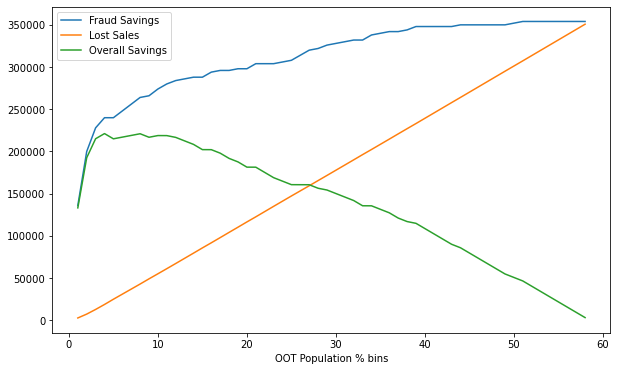

In [194]:
plt.figure(figsize=(10,6))
plt.plot(balance['bin'], balance['Fraud Savings'], label='Fraud Savings')
plt.plot(balance['bin'], balance['Lost Sales'], label='Lost Sales')
plt.plot(balance['bin'], balance['Overall Savings'], label='Overall Savings')
plt.xlabel('OOT Population % bins')
plt.legend()

## Fraud score trends

In [195]:
orig = variables.loc[variables['Date']>='2010-11-01']

In [196]:
orig['proba'] = model.predict_proba(X_oot[:,:20])[:,1]
orig

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,proba
83970,84300,5142150217,2010-11-01,680699669,GENERAL BINDING COR,IL,60062.0,P,182.00,0,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.247172,1.041152,0.001013
83971,84301,5142259911,2010-11-01,615679280335,RICOH CORPORATION,NJ,7006.0,P,174.61,0,...,7.000000,6.117314,13.108531,3.000000,7.000000,6.117314,13.108531,1.073077,1.957143,0.000485
83972,84302,5142224817,2010-11-01,8000326863954,WRIGHT BROTHERS INC.,OH,45237.0,P,53.00,0,...,7.000000,3.461628,2.897494,3.000000,7.000000,3.461628,2.897494,1.289957,1.143140,0.000095
83973,84303,5142250016,2010-11-01,6029900666875,DALLAS LAMINATING & FI,TX,75207.0,P,25.00,0,...,7.000000,14.000000,14.023934,3.000000,7.000000,14.000000,14.023934,1.181961,1.014835,0.000350
83974,84304,5142236765,2010-11-01,89200775185,GRTR PHILA CABLE,PA,19147.0,P,97.17,0,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.278667,0.000000,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.001244,0.000000,0.000213
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,7.000000,2.313526,4.957556,3.000000,7.000000,2.313526,4.957556,1.117701,1.052096,0.000326
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,7.000000,14.000000,30.000000,3.000000,7.000000,14.000000,30.000000,1.216545,1.096000,0.003395
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,7.000000,14.000000,24.060380,3.000000,7.000000,14.000000,24.060380,1.684457,1.052160,0.005040


In [197]:
score = orig.groupby('Cardnum')['proba'].agg(['max','min','std']).reset_index()
score['range'] = score['max'] - score['min']
score.sort_values(by='range', ascending=False)

,Cardnum,max,min,std,range
835,5142235211,0.954931,0.000754,0.390010,0.954177
341,5142160778,0.898810,0.000051,0.305756,0.898758
534,5142189945,0.732816,0.000122,0.118529,0.732693
628,5142202847,0.662571,0.000158,0.178032,0.662413
1090,5142278415,0.509696,0.001763,0.131212,0.507933
...,...,...,...,...,...
221,5142144169,0.000846,0.000846,NaN,0.000000
826,5142233953,0.000316,0.000316,NaN,0.000000
210,5142142100,0.037067,0.037067,NaN,0.000000
209,5142141882,0.003347,0.003347,NaN,0.000000


In [201]:
card = orig.loc[orig['Cardnum']=='5142235211']
card

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,proba
87228,87572,5142235211,2010-11-17,8488900610006,PLASTIC-CRAFT PRODUCTS,NY,10994.0,P,327.47,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,0.000000,0.000754
89021,89365,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,472.53,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.000846
89022,89366,5142235211,2010-11-25,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,1397.77,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.002421
89023,89367,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,497.03,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.002209
89025,89369,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,890.53,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.014738
89031,89375,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,1288.90,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.012632
89034,89378,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,3619.88,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.304695
89037,89381,5142235211,2010-11-25,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,1310.28,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.217474
89040,89384,5142235211,2010-11-25,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,204.21,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.331314
89048,89392,5142235211,2010-11-25,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,1016.16,1,...,7.000000,14.000000,30.000000,3.0,7.0,14.0,30.0,1.473931,1.007355,0.230084


In [202]:
card.groupby('Date').count()

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dow,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,proba
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-17,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2010-11-25,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
2010-11-26,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2010-12-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [203]:
card[['Date','proba']]

,Date,proba
87228,2010-11-17,0.000754
89021,2010-11-25,0.000846
89022,2010-11-25,0.002421
89023,2010-11-25,0.002209
89025,2010-11-25,0.014738
89031,2010-11-25,0.012632
89034,2010-11-25,0.304695
89037,2010-11-25,0.217474
89040,2010-11-25,0.331314
89048,2010-11-25,0.230084


In [204]:
card_increase = pd.concat([pd.DataFrame({'Date':pd.date_range('2010-11-18','2010-11-24'),'proba':0}),
                           card[['Date','proba']],
                           pd.DataFrame({'Date':pd.date_range('2010-11-27','2010-11-30'),'proba':0})])

In [205]:
import datetime as dt

In [206]:
card_increase['Date'] = pd.to_datetime(card_increase['Date'])
card_increase = card_increase.sort_values(by='Date')
card_increase = card_increase.groupby('Date').max()
card_increase = card_increase.reset_index()

In [207]:
card_increase['month'] = card_increase['Date'].dt.month
card_increase['day'] = card_increase['Date'].dt.day
card_increase['Date'] = card_increase['month'].astype(str)+'-'+card_increase['day'].astype(str)
card_increase

,Date,proba,month,day
0,11-17,0.000754,11,17
1,11-18,0.000000,11,18
2,11-19,0.000000,11,19
3,11-20,0.000000,11,20
4,11-21,0.000000,11,21
5,11-22,0.000000,11,22
6,11-23,0.000000,11,23
7,11-24,0.000000,11,24
8,11-25,0.910052,11,25
9,11-26,0.954931,11,26


Text(0.5, 1.0, 'Card Number = 5142235211')

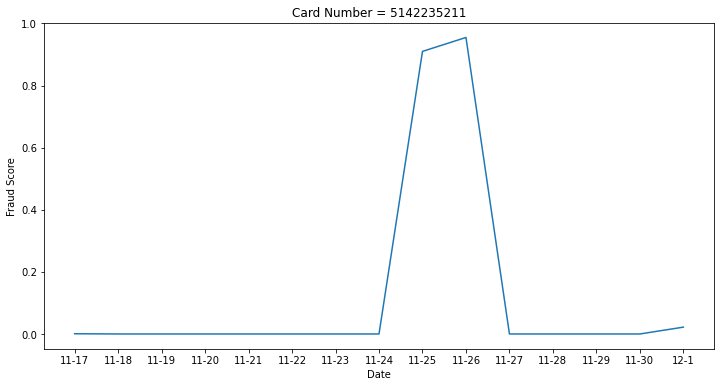

In [208]:
plt.figure(figsize=(12,6))
plt.plot(card_increase['Date'], card_increase['proba'])
plt.ylabel('Fraud Score')
plt.xlabel('Date')
plt.title('Card Number = 5142235211')

Text(0.5, 0, 'Transaction Count with Card 5142235211')

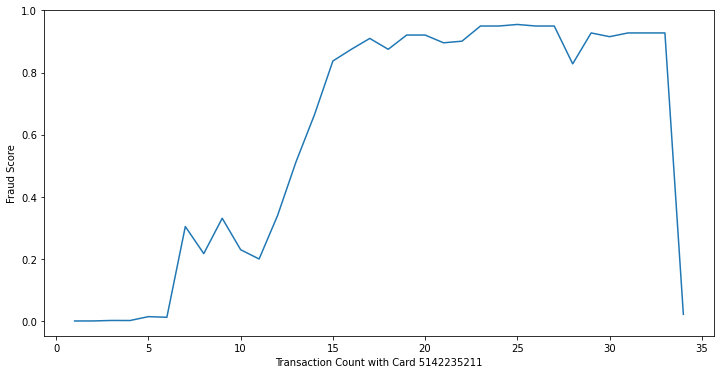

In [209]:
plt.figure(figsize=(12,6))
plt.plot(range(1,len(card)+1),card['proba'])
plt.ylabel('Fraud Score')
plt.xlabel('Transaction Count with Card 5142235211')

In [210]:
score = orig.groupby('Merchnum')['proba'].agg(['max','min','std','count']).reset_index()
score['range'] = score['max'] - score['min']
score.sort_values(by='std', ascending=False)[:20]

,Merchnum,max,min,std,count,range
61,08-0091000339,0.671779,0.009015,0.468645,2,0.662764
847,4503010647100,0.662571,0.002515,0.466730,2,0.660056
66,08-0616075333,0.852829,0.000701,0.425035,5,0.852128
335,2200000002891,0.851118,0.000115,0.416509,4,0.851003
47,08-0004002336,0.898810,0.000068,0.388718,7,0.898742
102,08-3508354542,0.483340,0.001852,0.340463,2,0.481488
835,4495235360205,0.660560,0.000316,0.330084,4,0.660243
819,4353000719908,0.954931,0.000068,0.276032,193,0.954863
3396,9977060941600,0.614035,0.000736,0.253505,4,0.613299
63,08-0096054334,0.699748,0.000113,0.220476,10,0.699636


In [211]:
card = orig.loc[orig['Merchnum']=='4353000719908']
card

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Cardnum_Merch zip_amount_0_by_7,Cardnum_Merch zip_amount_0_by_14,Cardnum_Merch zip_amount_0_by_30,Cardnum_Merch zip_amount_1_by_3,Cardnum_Merch zip_amount_1_by_7,Cardnum_Merch zip_amount_1_by_14,Cardnum_Merch zip_amount_1_by_30,Benford_Cardnum,Benford_Merchnum,proba
84104,84434,5142170410,2010-11-01,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,35.94,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.202927,1.007355,0.001909
84124,84454,5142141358,2010-11-01,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,34.02,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.011692,1.007355,0.000631
84194,84524,5142124208,2010-11-02,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,421.80,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.145818,1.007355,0.000786
84283,84613,5142224426,2010-11-02,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,56.95,0,...,7.000000,8.614803,0.691953,3.0,7.0,8.614803,0.691953,1.438798,1.007355,0.004360
84341,84671,5142132687,2010-11-02,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,21.42,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.042537,1.007355,0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96174,96530,5142146217,2010-12-30,4353000719908,AMAZON.COM *SUPERSTRE,WA,98101.0,P,240.95,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.357196,1.007355,0.000335
96209,96565,5142190418,2010-12-30,4353000719908,AMAZON.COM *SUPERSTRE,WA,98101.0,P,46.94,0,...,7.000000,3.286950,7.043465,3.0,7.0,3.286950,7.043465,1.029171,1.007355,0.000112
96268,96624,5142178848,2010-12-30,4353000719908,AMAZON.COM *SUPERSTRE,WA,98101.0,P,18.46,0,...,2.361908,4.723816,10.122464,3.0,7.0,14.000000,30.000000,1.045932,1.007355,0.001381
96316,96672,5142217905,2010-12-30,4353000719908,AMAZON.COM *SUPERSTRE,WA,98101.0,P,68.90,0,...,7.000000,14.000000,30.000000,3.0,7.0,14.000000,30.000000,1.056464,1.007355,0.000154


In [212]:
card_increase = card.loc[(card['Date']>='2010-11-01')&(card['Date']<='2010-11-30'),['Date','proba']]
card_increase

,Date,proba
84104,2010-11-01,0.001909
84124,2010-11-01,0.000631
84194,2010-11-02,0.000786
84283,2010-11-02,0.004360
84341,2010-11-02,0.000302
...,...,...
89186,2010-11-26,0.927641
89233,2010-11-28,0.000754
89304,2010-11-29,0.000801
89471,2010-11-30,0.000347


In [213]:
card_increase.groupby('Date').count()

,proba
Date,
2010-11-01,2
2010-11-02,5
2010-11-03,1
2010-11-04,5
2010-11-06,2
2010-11-08,3
2010-11-09,2
2010-11-10,3
2010-11-12,2


In [214]:
card_increase = pd.concat([pd.DataFrame({'Date':pd.date_range('2010-11-01','2010-11-30'),'proba':0}),
                           card_increase[['Date','proba']]])
card_increase

,Date,proba
0,2010-11-01,0.000000
1,2010-11-02,0.000000
2,2010-11-03,0.000000
3,2010-11-04,0.000000
4,2010-11-05,0.000000
...,...,...
89186,2010-11-26,0.927641
89233,2010-11-28,0.000754
89304,2010-11-29,0.000801
89471,2010-11-30,0.000347


In [215]:
card_increase['Date'] = pd.to_datetime(card_increase['Date'])
card_increase = card_increase.sort_values(by='Date')
card_increase = card_increase.groupby('Date').max()
card_increase.reset_index(inplace=True)
card_increase

,Date,proba
0,2010-11-01,0.001909
1,2010-11-02,0.004360
2,2010-11-03,0.000714
3,2010-11-04,0.010527
4,2010-11-05,0.000000
5,2010-11-06,0.000600
6,2010-11-07,0.000000
7,2010-11-08,0.005374
8,2010-11-09,0.000358
9,2010-11-10,0.001242


In [216]:
card_increase['month'] = card_increase['Date'].dt.month
card_increase['day'] = card_increase['Date'].dt.day
card_increase['Date'] = card_increase['month'].astype(str)+'-'+card_increase['day'].astype(str)
card_increase

,Date,proba,month,day
0,11-1,0.001909,11,1
1,11-2,0.004360,11,2
2,11-3,0.000714,11,3
3,11-4,0.010527,11,4
4,11-5,0.000000,11,5
5,11-6,0.000600,11,6
6,11-7,0.000000,11,7
7,11-8,0.005374,11,8
8,11-9,0.000358,11,9
9,11-10,0.001242,11,10


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

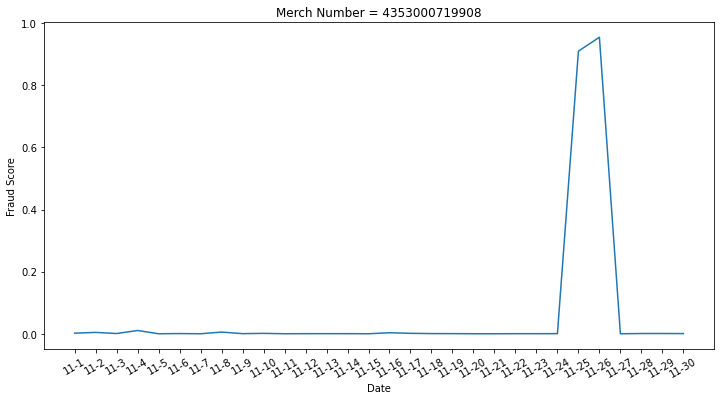

In [217]:
plt.figure(figsize=(12,6))
ax = plt.plot(card_increase['Date'], card_increase['proba'])
plt.ylabel('Fraud Score')
plt.xlabel('Date', )
plt.title('Merch Number = 4353000719908')
import pylab as pl
pl.xticks(rotation=30)

Text(0.5, 0, 'Transaction Count with Merch 4353000719908')

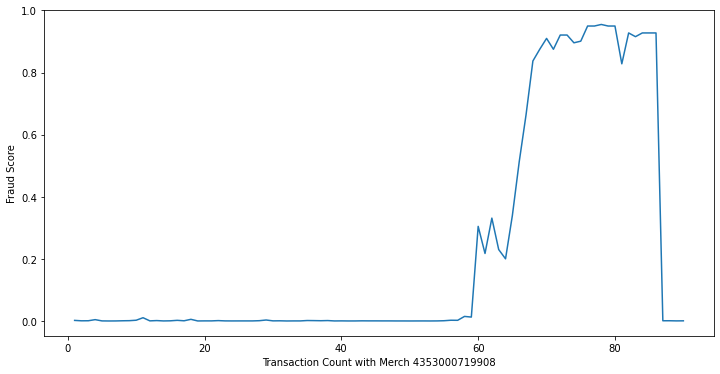

In [218]:
plt.figure(figsize=(12,6))
ax = plt.plot(range(1,len(card.loc[(card['Date']>='2010-11-01')&(card['Date']<='2010-11-30')][['Date','Fraud','proba']])+1), card.loc[(card['Date']>='2010-11-01')&(card['Date']<='2010-11-30')]['proba'])
plt.ylabel('Fraud Score')
plt.xlabel('Transaction Count with Merch 4353000719908')